# Cluster Analysis

![image.png](img/clusters.png)

### Importação de bibliotecas essenciais

In [131]:
# Importação de bibliotecas essenciais
import pandas as pd  # Manipulação de dados em DataFrames
import numpy as np  # Operações matemáticas e manipulação de arrays

# Bibliotecas de visualização de dados
import seaborn as sns  # Visualizações estatísticas
import matplotlib.pyplot as plt  # Visualizações estáticas
import plotly.graph_objects as go # Visualizações estáticas

# Configuração para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Configuração de localização para formatar números no padrão brasileiro
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')  # Configura a localização para o Brasil
format = lambda num: locale.format_string("%d", num, grouping=True)  # Formata números com separador de milhar

import warnings

# Importação de funções matemáticas específicas
from math import pi  # Utilizado para cálculos envolvendo o número pi

from scipy.stats import norm # Expectativas de crescimento

### Importação e visualização do dataset

In [132]:
df = pd.read_csv('data/df_with_clusters.csv')
df.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   
3  6182        1984  Graduation       Together   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Year  Month  Day  Age  Recency  Complain  Children  FamilySize  \
0  2012-09-04  2012      9    4   57       58         0         0           0   
1  2014-03-08  2014      3    8   60       38         0         2           2   
2  2013-08-21  2013      8   21   49       26         0         0           1   
3  2014-02-10  2014      2   10   30       26         0         1           2   
4  2014-01-19  2014      1   19   33       94         0         1           2   

   IsMarried  SeniorityDays  MntWines  MntFruits  MntMeatProducts  \
0          0            663       635         88              546   
1          0            113        11          1                6   
2          1            312       426         49              127   
3          1            139        11          4               20   
4          1            161       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  TotalMntSpent  \
0              172                88            88           1617   
1                2                 1             6             27   
2              111                21            42            776   
3               10                 3             5             53   
4               46                27            15            422   

   TotalPurchases  AvgPurchaseValue  NumDealsPurchases  AcceptedCmp1  \
0              25                64                  3             0   
1               6                 4                  2             0   
2              21                36                  1             0   
3               8                 6                  2             0   
4              19                22                  5             0   

   AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0             0             0             0             0   
1             0             0             0             0   
2             0             0             0             0   
3             0             0             0             0   
4             0             0             0             0   

   AcceptedAnyCampaign  Response  NumWebPurchases  NumCatalogPurchases  \
0                    0         1                8                   10   
1                    0         0                1                    1   
2                    0         0                8                    2   
3                    0         0                2                    0   
4                    0         0                5                    3   

   NumStorePurchases  NumWebVisitsMonth  WebVsStorePurchases        Date  \
0                  4                  7                    2  2012-09-04   
1                  2                  5                    0  2014-03-08   
2                 10                  4                    0  2013-08-21   
3                  4                  6                    0  2014-02-10   
4                  6                  5                    0  2014-01-19   

     IncomeRange  Clusters  
0  41 Mil-61 Mil         1  
1  41 Mil-61 Mil         3  
2  61 Mil-82 Mil         3  
3  21 Mil-41 Mil         2  
4  41 Mil-61 Mil         2

## Quantidade de indivíduos de cada Cluster

In [133]:
# Dados de entrada (clusters e suas frequências)
cluster_counts = df['Clusters'].value_counts()

# Definindo cores para os clusters
cores_marcadores = ["khaki", "MediumSeaGreen", "crimson", "limegreen", "tomato"]

# Destaque para os clusters 0 e 1
pull_values = [0.15 if cluster in [0, 1] else 0 for cluster in cluster_counts.index]

# Gráfico de Pizza (Donut)
fig = go.Figure(data=go.Pie(
    labels=cluster_counts.index,
    values=cluster_counts.values,
    marker_colors=cores_marcadores[:len(cluster_counts)],  # Ajustar cores ao número de clusters
    hole=0.5,  # Furo no centro
    pull=pull_values  # Destaque para os clusters
))

# Rótulos
fig.update_traces(
    textposition="outside",
    textinfo="percent+label"
)

# Legenda
fig.update_layout(
    legend_title_text="Clusters",
    legend=dict(
        orientation="h",
        xanchor="center",
        x=0.5
    )
)

# Texto central
fig.update_layout(
    annotations=[dict(
        text="Distribuição",
        x=0.5,
        y=0.5,
        font_size=18,
        showarrow=False
    )]
)

# Exibindo o gráfico
fig.show()

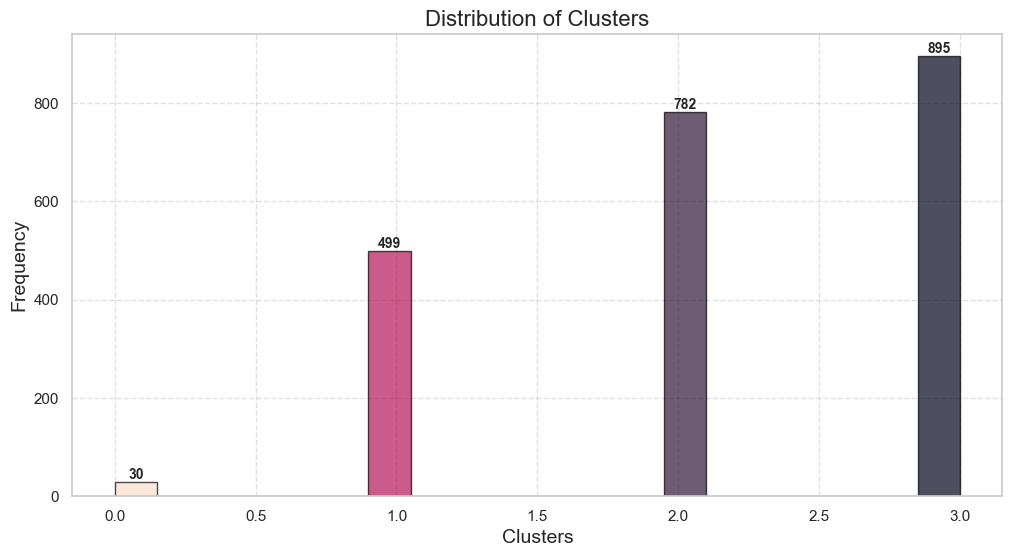

In [134]:
def plot_distribution(column):
    plt.figure(figsize=(12, 6))
    
    if pd.api.types.is_numeric_dtype(df[column]):
        # Numeric data: Plot a histogram
        n, bins, patches = plt.hist(df[column], bins=20, color='blue', alpha=0.7, edgecolor='black')
        for i in range(len(patches)):
            patches[i].set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(n[i] / max(n)))
            if n[i] > 0:
                plt.text(patches[i].get_x() + patches[i].get_width() / 2, n[i], int(n[i]), 
                         ha='center', va='bottom', fontsize=10, fontweight='bold')
        plt.title(f'Distribution of {column}', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
    
    else:
        # Categorical data: Plot a bar chart
        value_counts = df[column].value_counts()
        bars = plt.bar(value_counts.index, value_counts.values, color='blue', alpha=0.7, edgecolor='black')
        for i, bar in enumerate(bars):
            bar.set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(value_counts.values[i] / max(value_counts.values)))
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
                     ha='center', va='bottom', fontsize=10, fontweight='bold')
        plt.title(f'Distribution of {column}', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

plot_distribution('Clusters')

## Análise temporal do número de indivíduos para cada Cluster

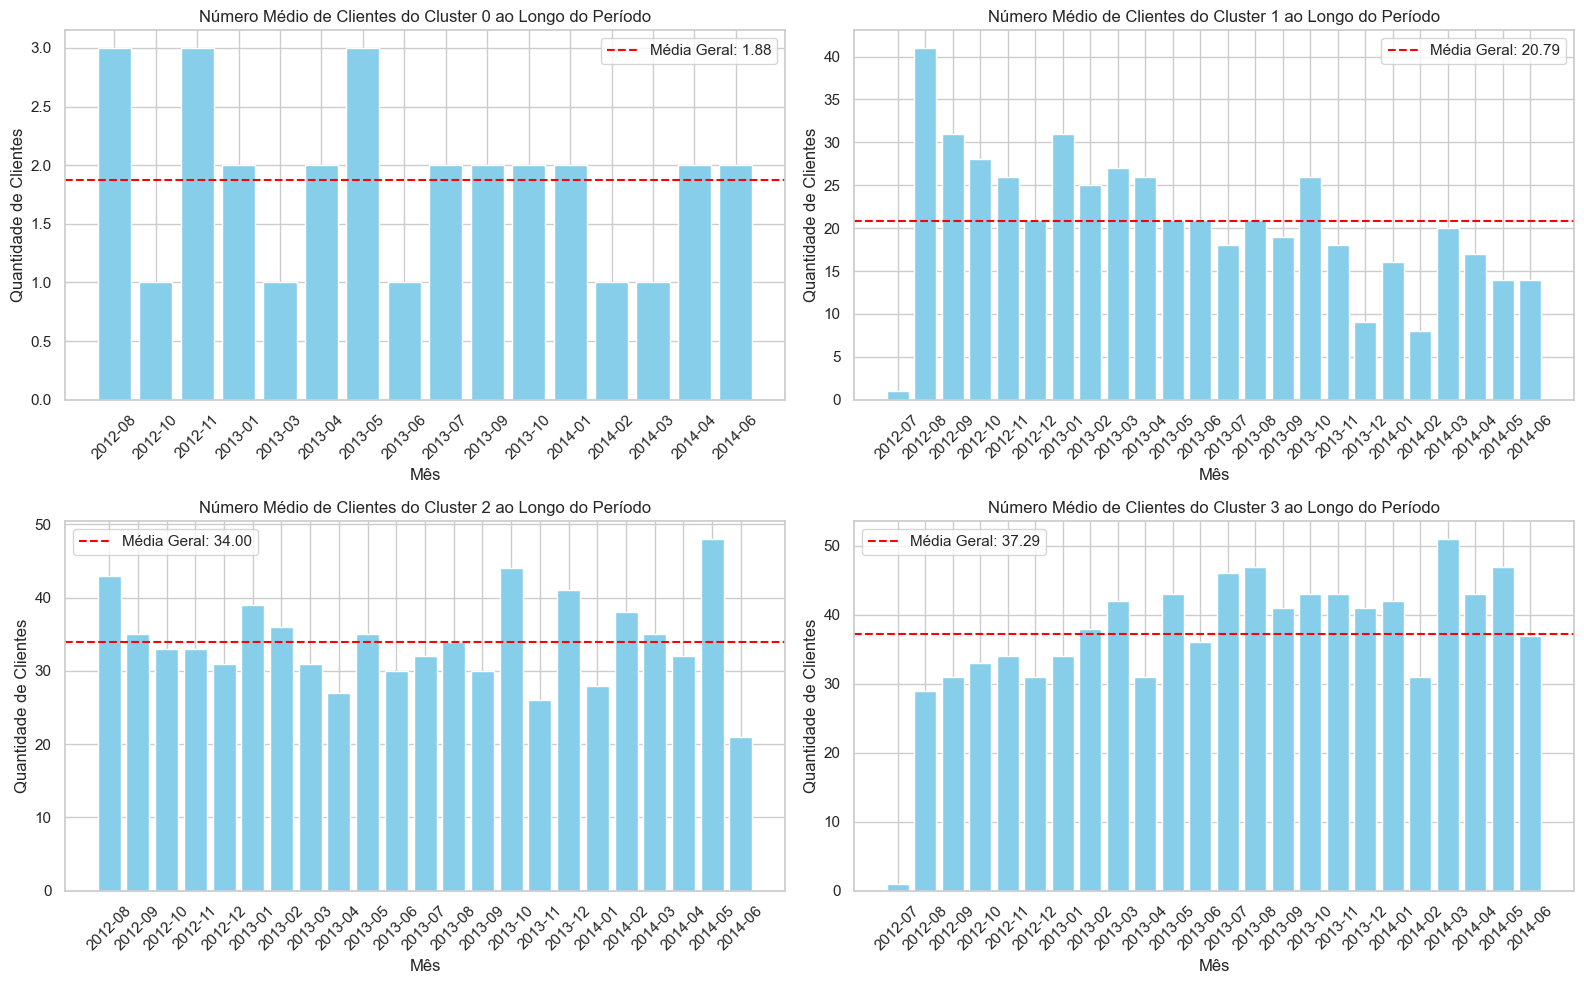

In [135]:
def timeline_clusters_subplot(data, clusters):
    # Número de gráficos
    n_graficos = len(clusters)

    # Configuração de layout com 2 colunas
    n_colunas = 2
    n_linhas = -(-n_graficos // n_colunas)  # Cálculo do número de linhas com arredondamento para cima

    # Criando a figura
    fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(16, 5 * n_linhas))
    axes = axes.flatten()  # Achatar os eixos para fácil iteração

    for i, cluster in enumerate(clusters):
        # Filtrar os dados para o Cluster
        cluster_data = data[data['Clusters'] == cluster].copy()

        # Converter a coluna 'Date' para datetime
        cluster_data['Date'] = pd.to_datetime(cluster_data['Date'])

        # Criar uma nova coluna para o ano e o mês
        cluster_data['YearMonth'] = cluster_data['Date'].dt.to_period('M')

        # Calcular a média mensal da quantidade de clientes
        monthly_avg = cluster_data.groupby('YearMonth').size()

        # Calcular a média geral
        overall_mean = monthly_avg.mean()

        # Criar o gráfico de barras no eixo correspondente
        axes[i].bar(monthly_avg.index.astype(str), monthly_avg, color='skyblue')
        axes[i].axhline(y=overall_mean, color='red', linestyle='--', label=f'Média Geral: {overall_mean:.2f}')
        axes[i].set_title(f'Número Médio de Clientes do Cluster {cluster} ao Longo do Período', fontsize=12)
        axes[i].set_xlabel('Mês')
        axes[i].set_ylabel('Quantidade de Clientes')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend()

    # Removendo eixos vazios caso o número de gráficos seja ímpar
    for i in range(n_graficos, len(axes)):
        fig.delaxes(axes[i])

    # Ajuste dos espaçamentos
    plt.tight_layout()
    plt.show()

# Chamando a função para gerar os gráficos
clusters = [0, 1, 2, 3]
timeline_clusters_subplot(df, clusters)

## Distribuição dos Clusters em determinadas variáveis

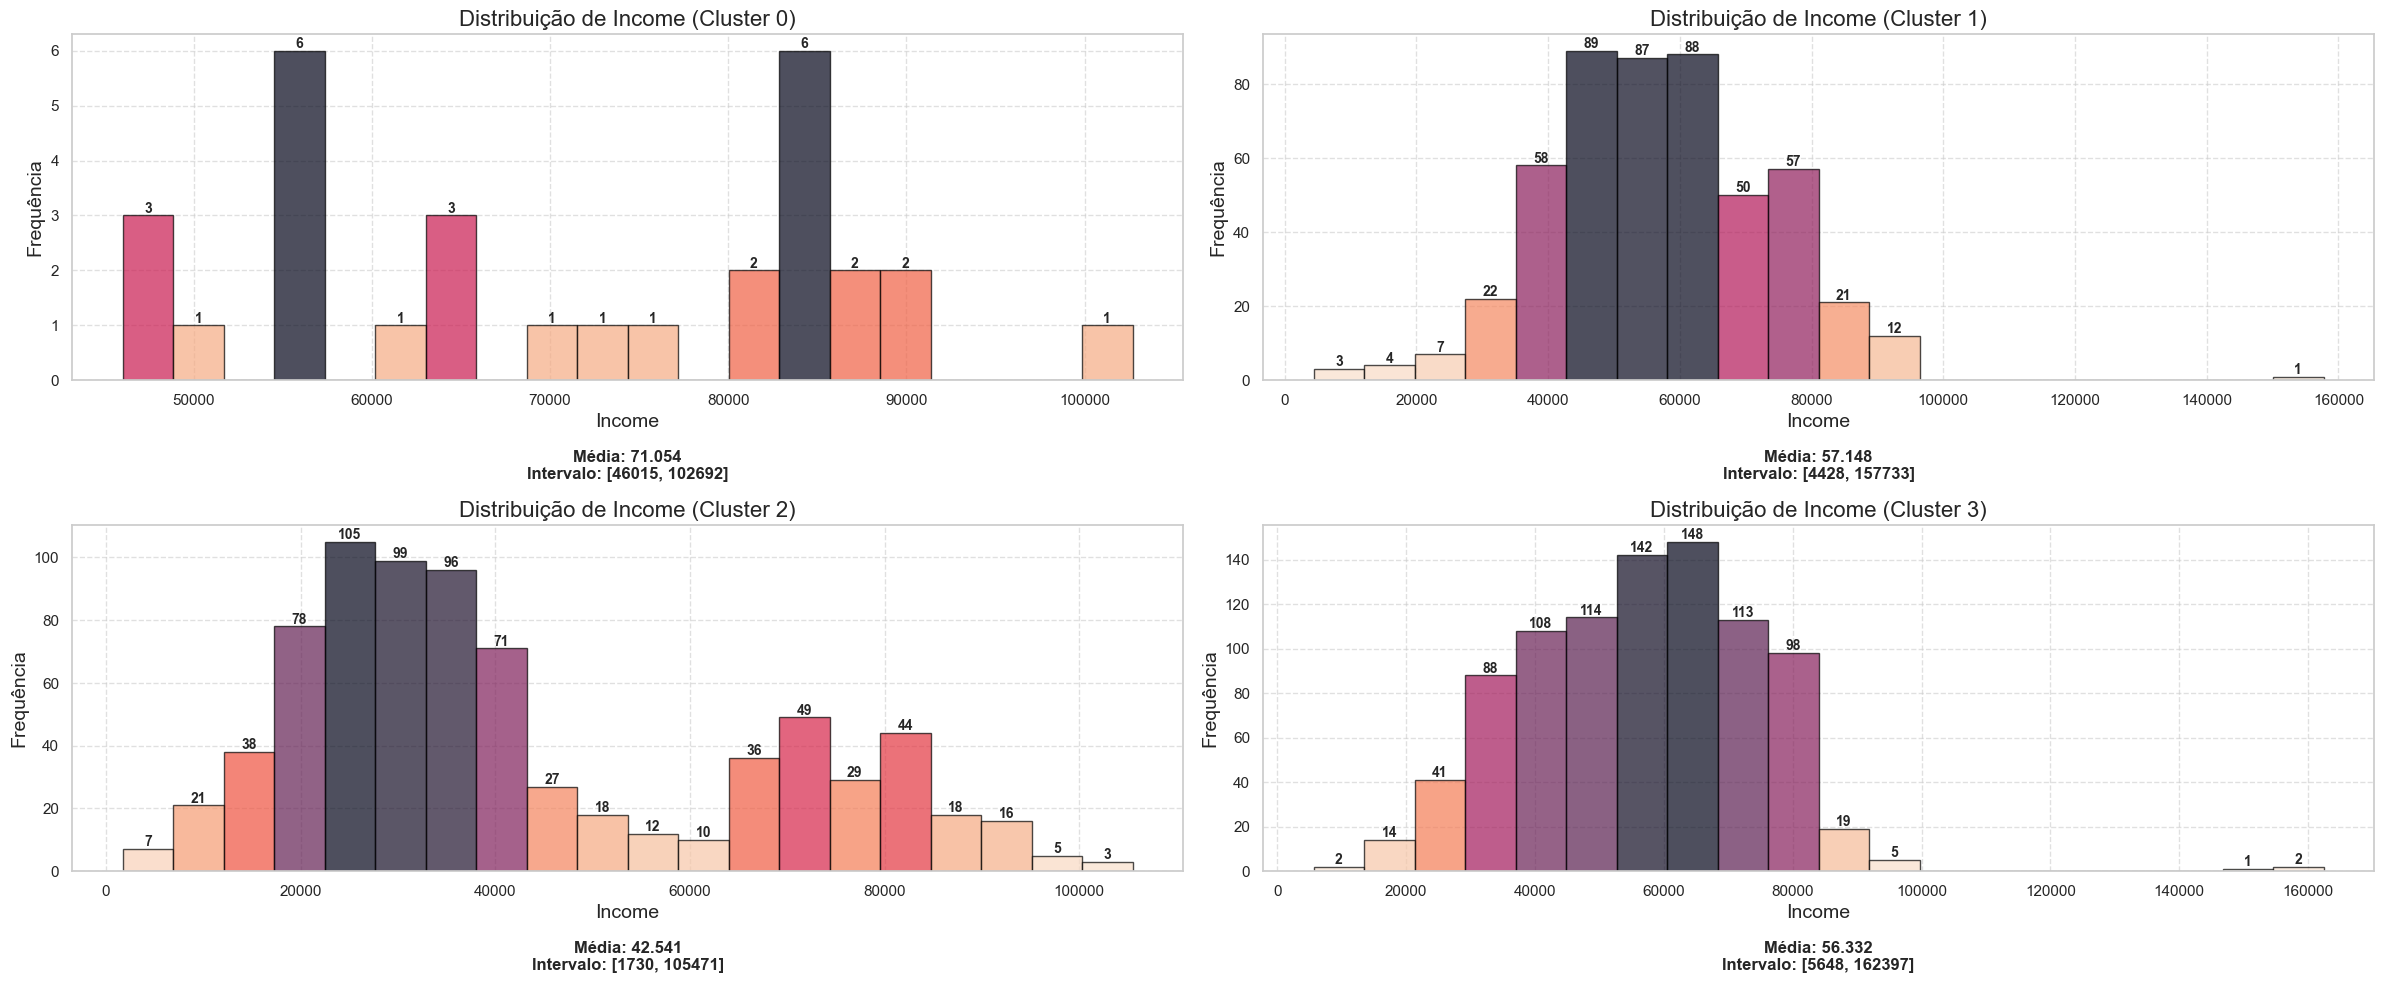

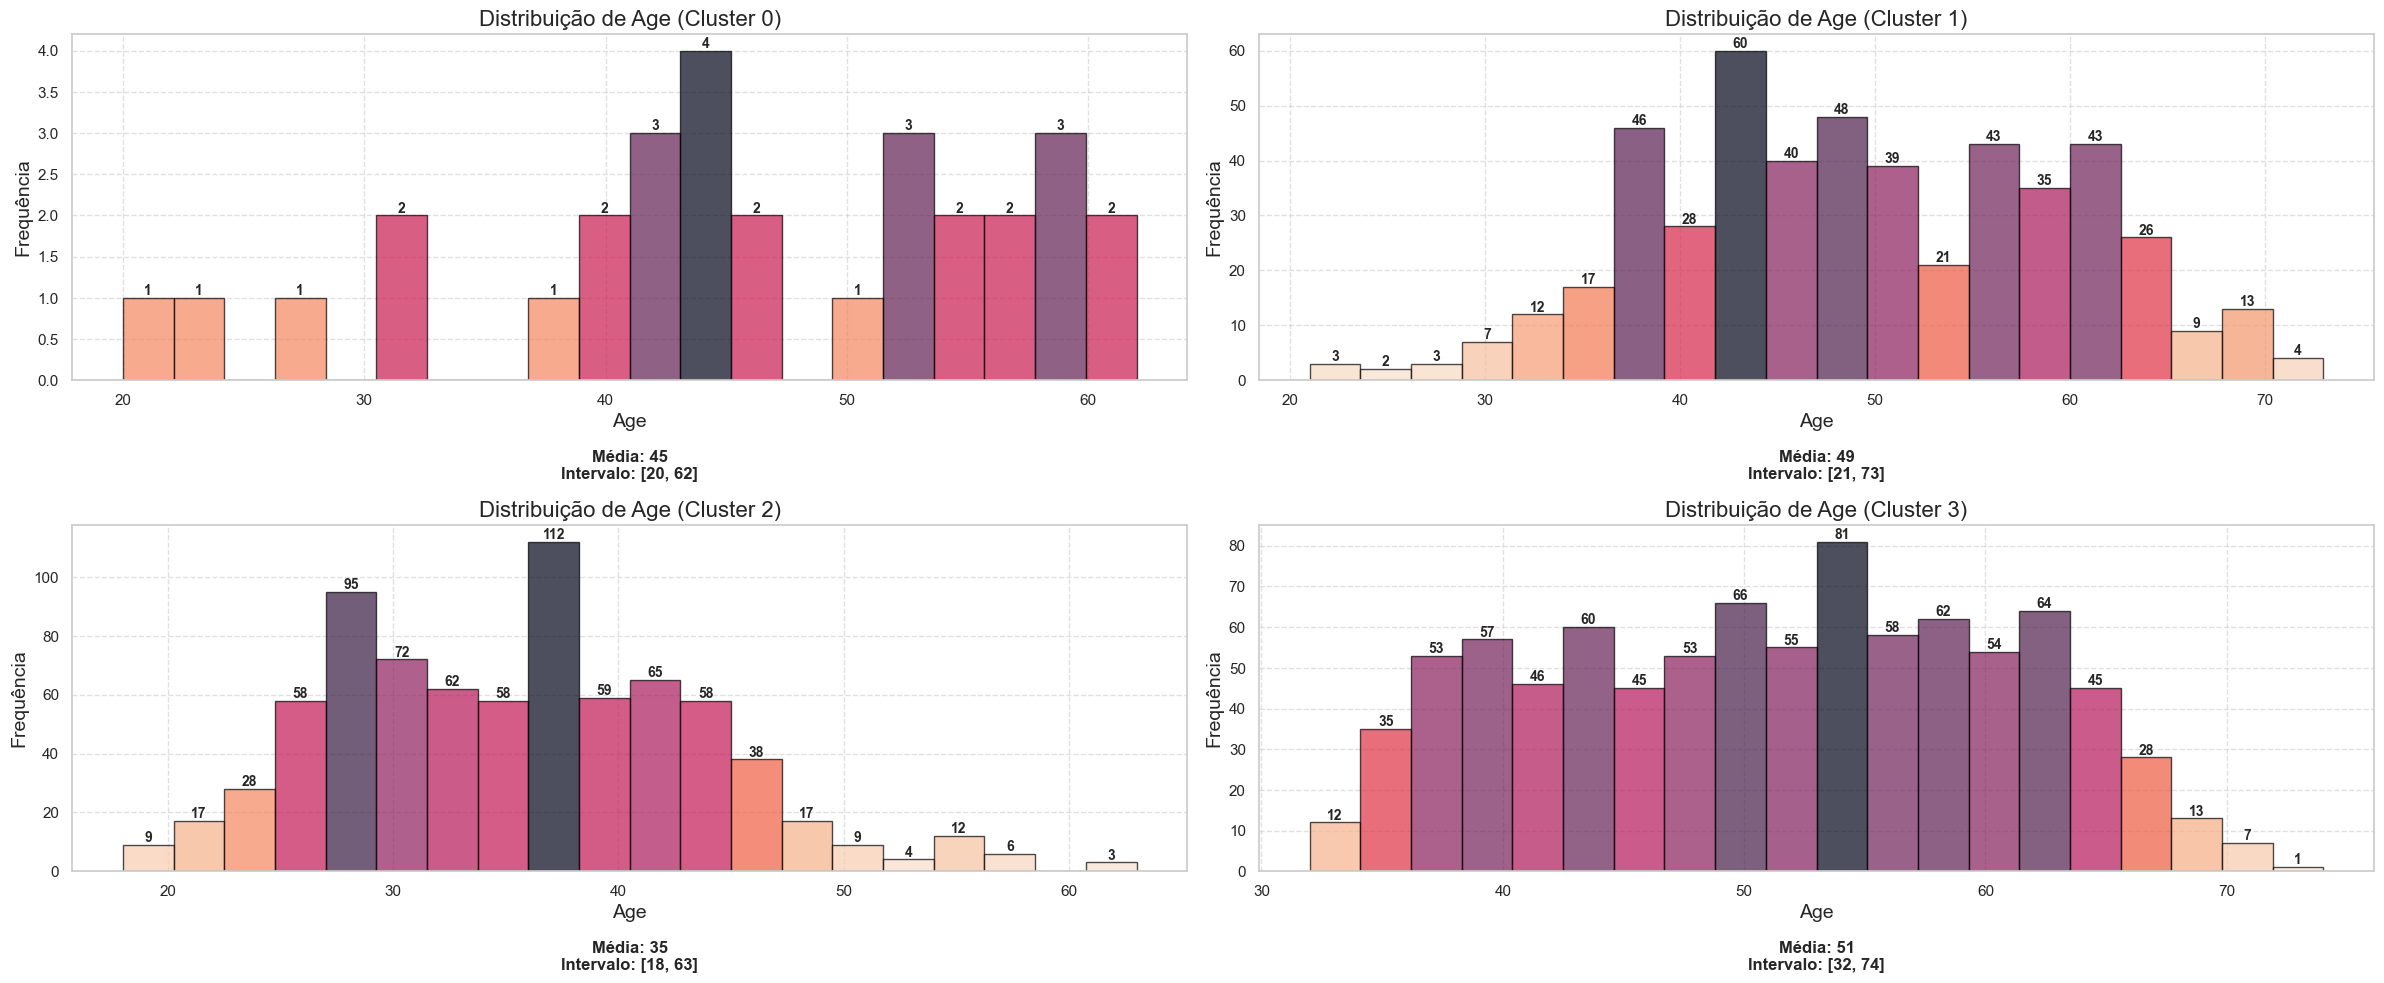

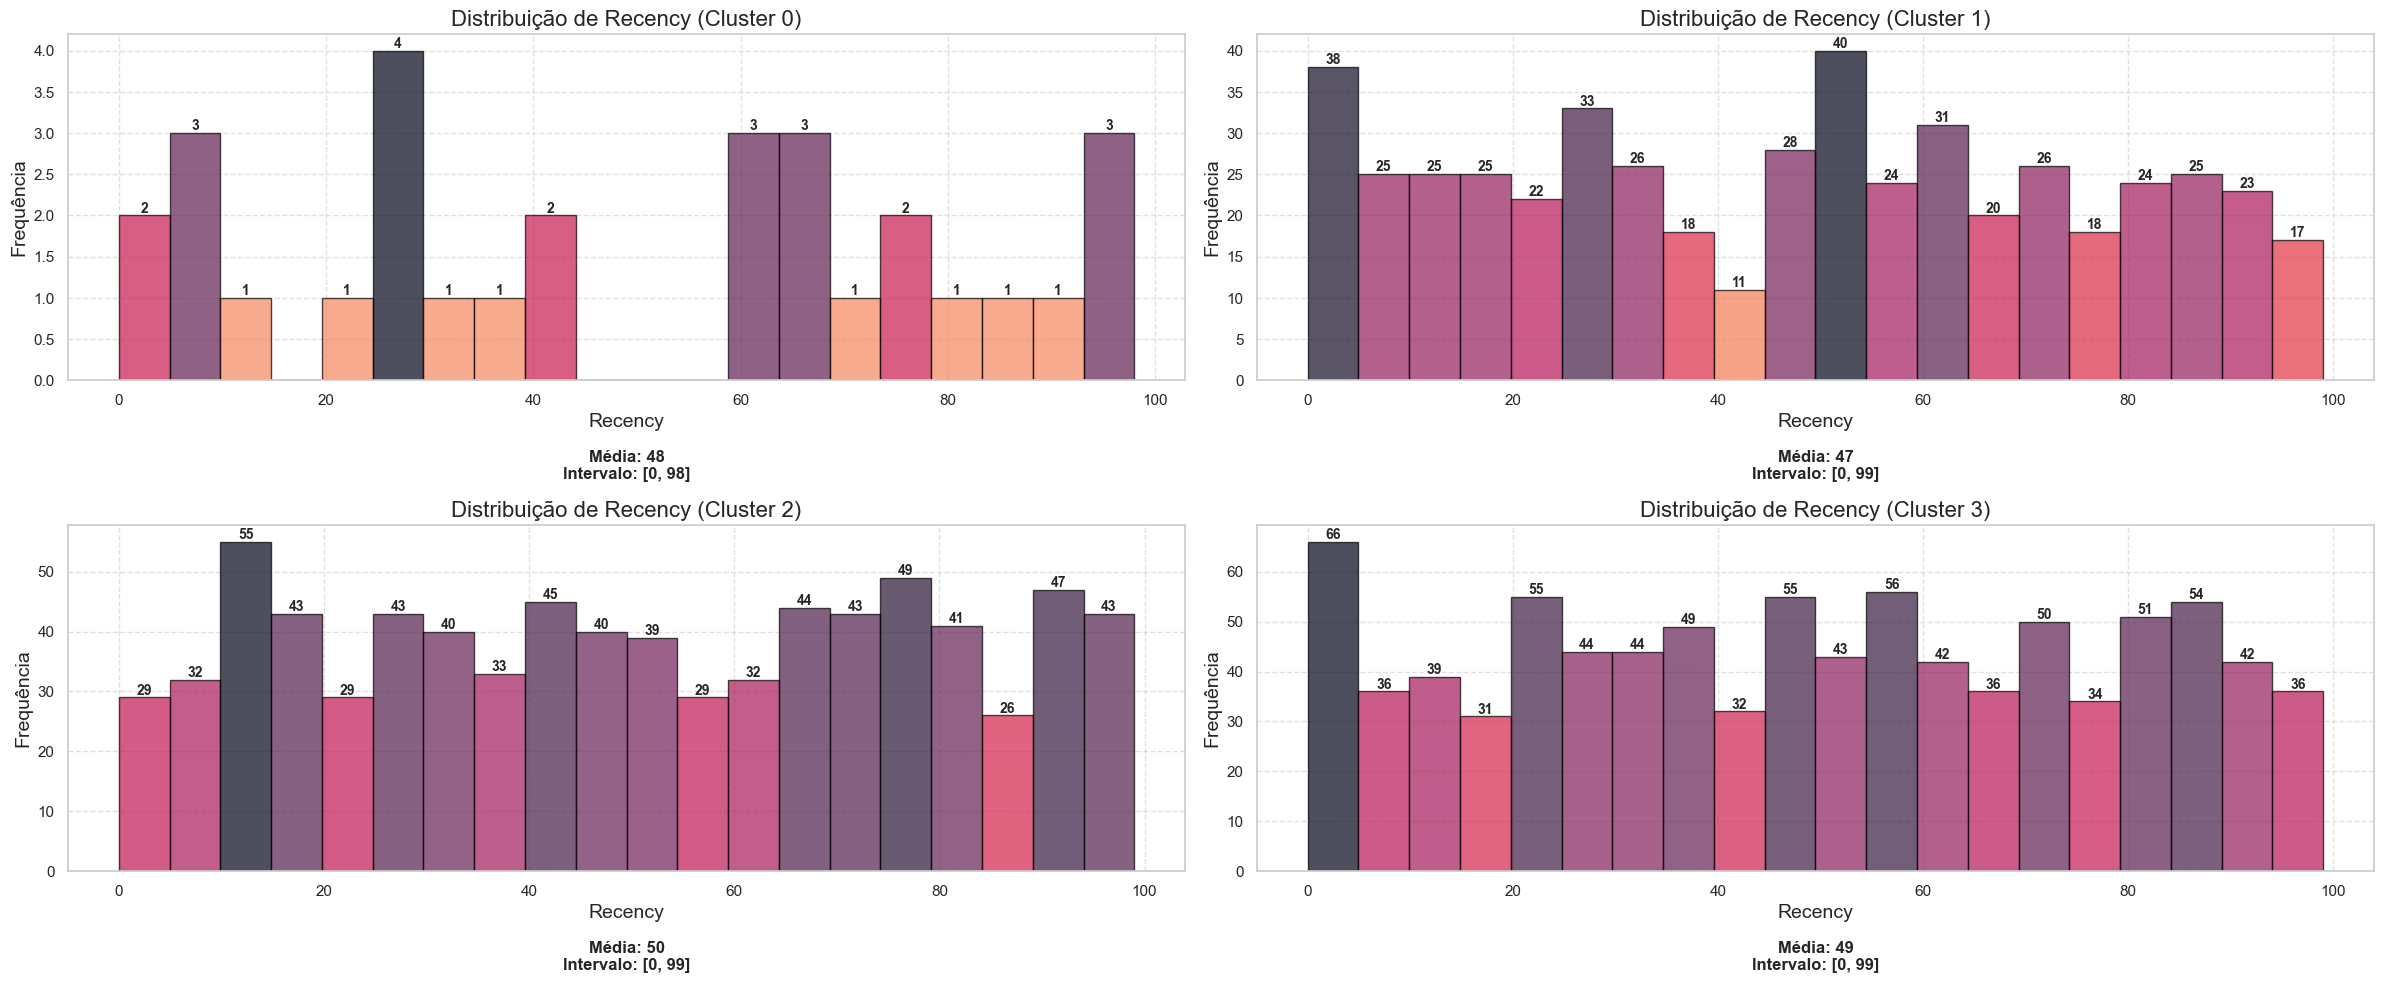

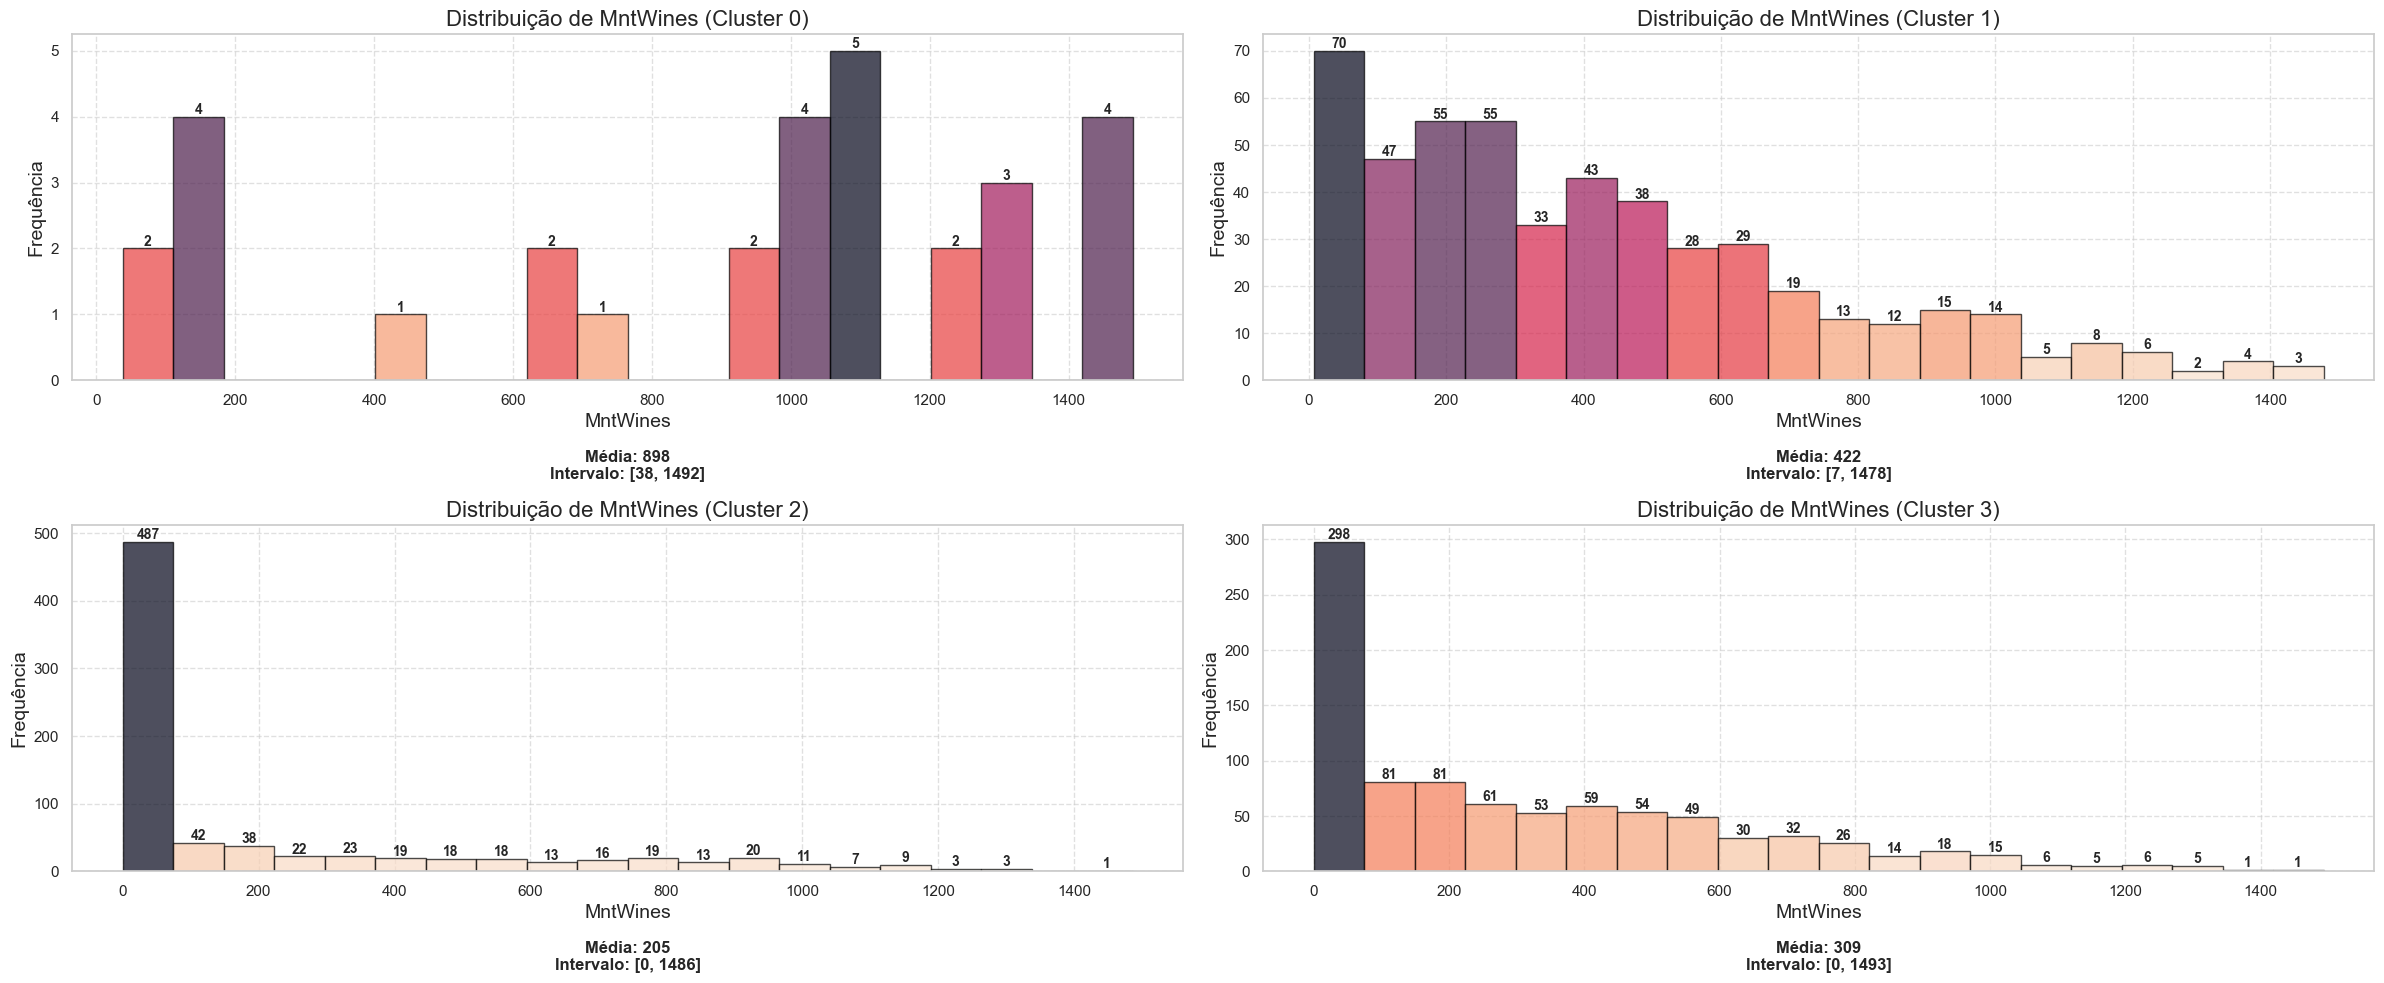

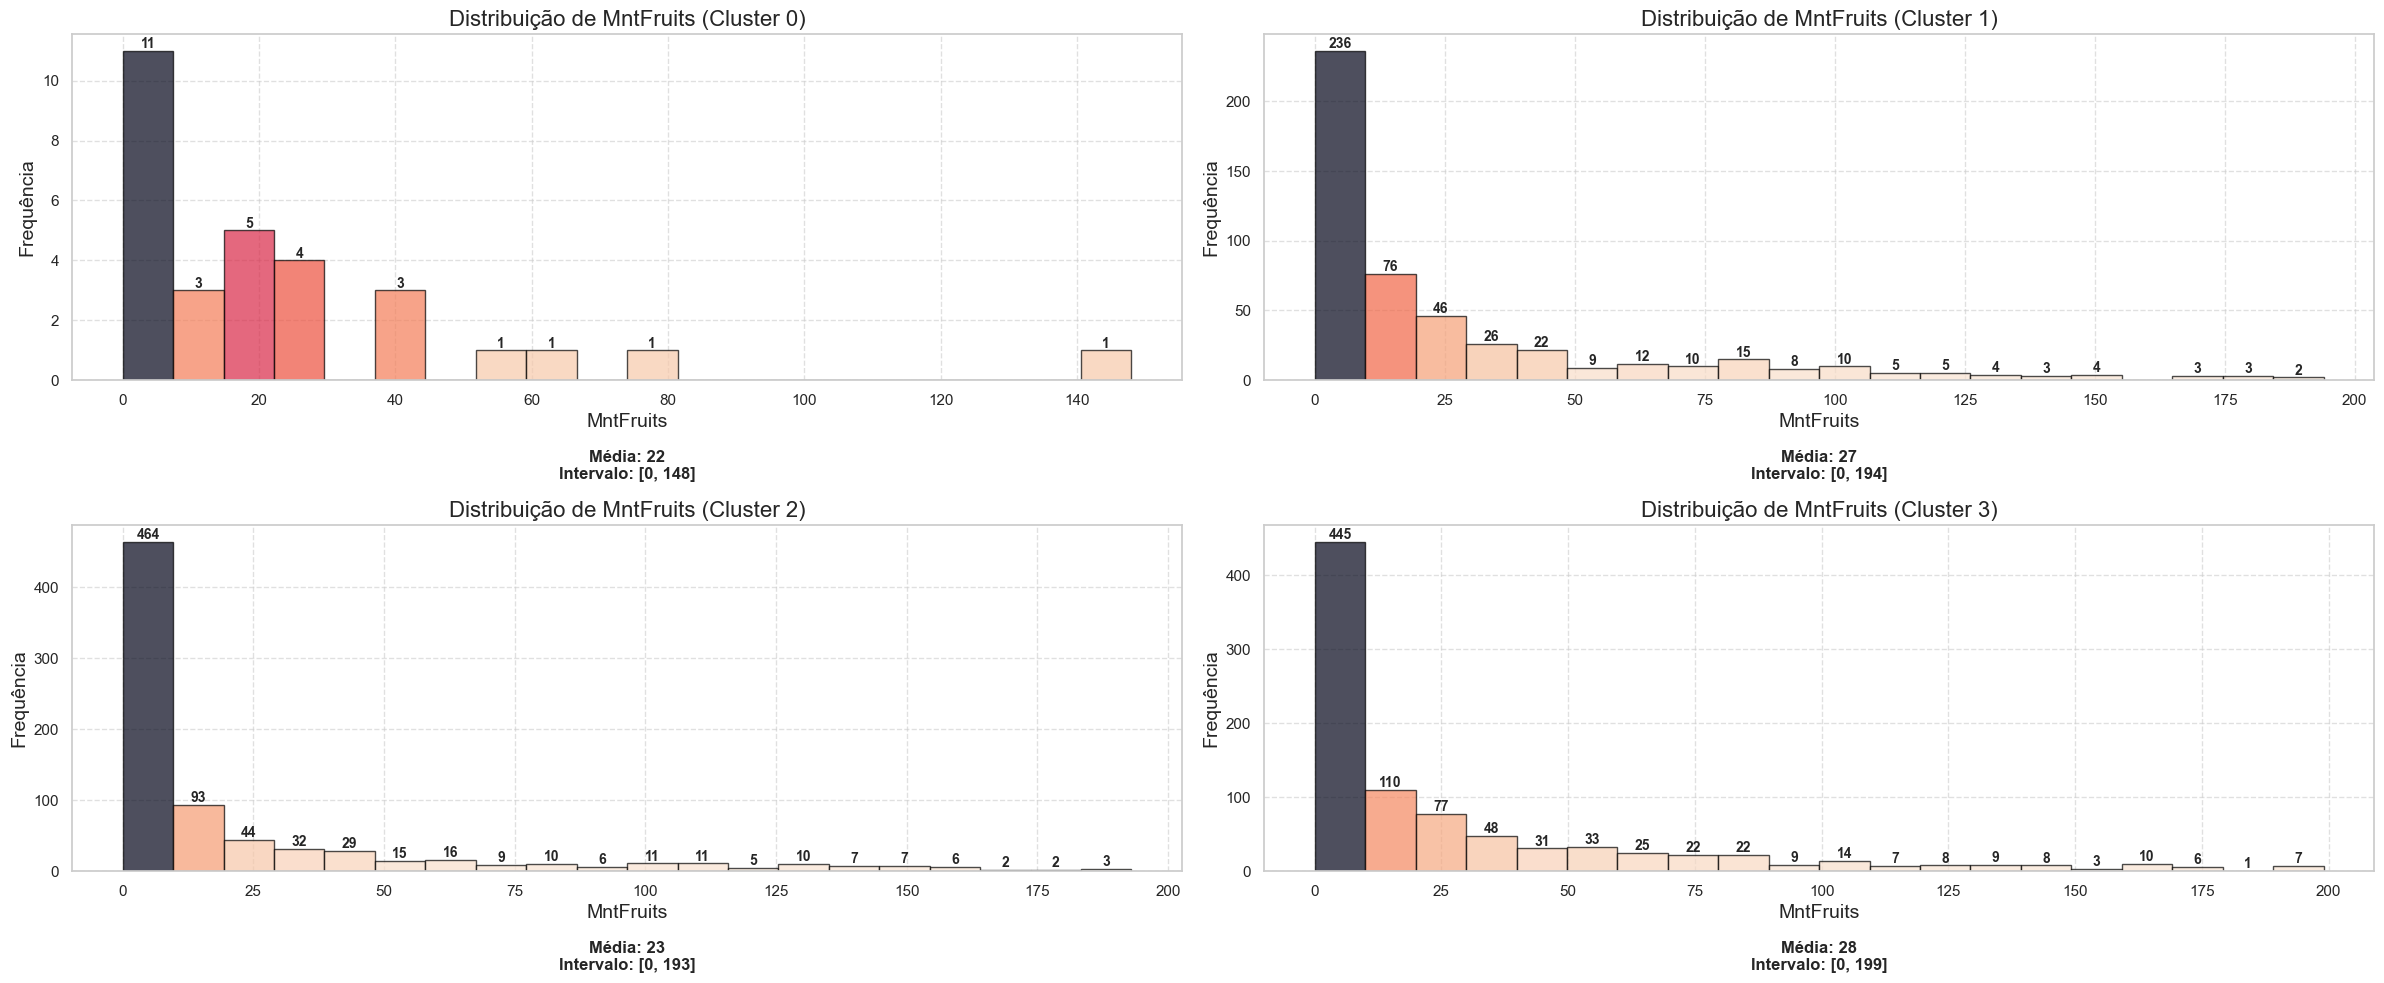

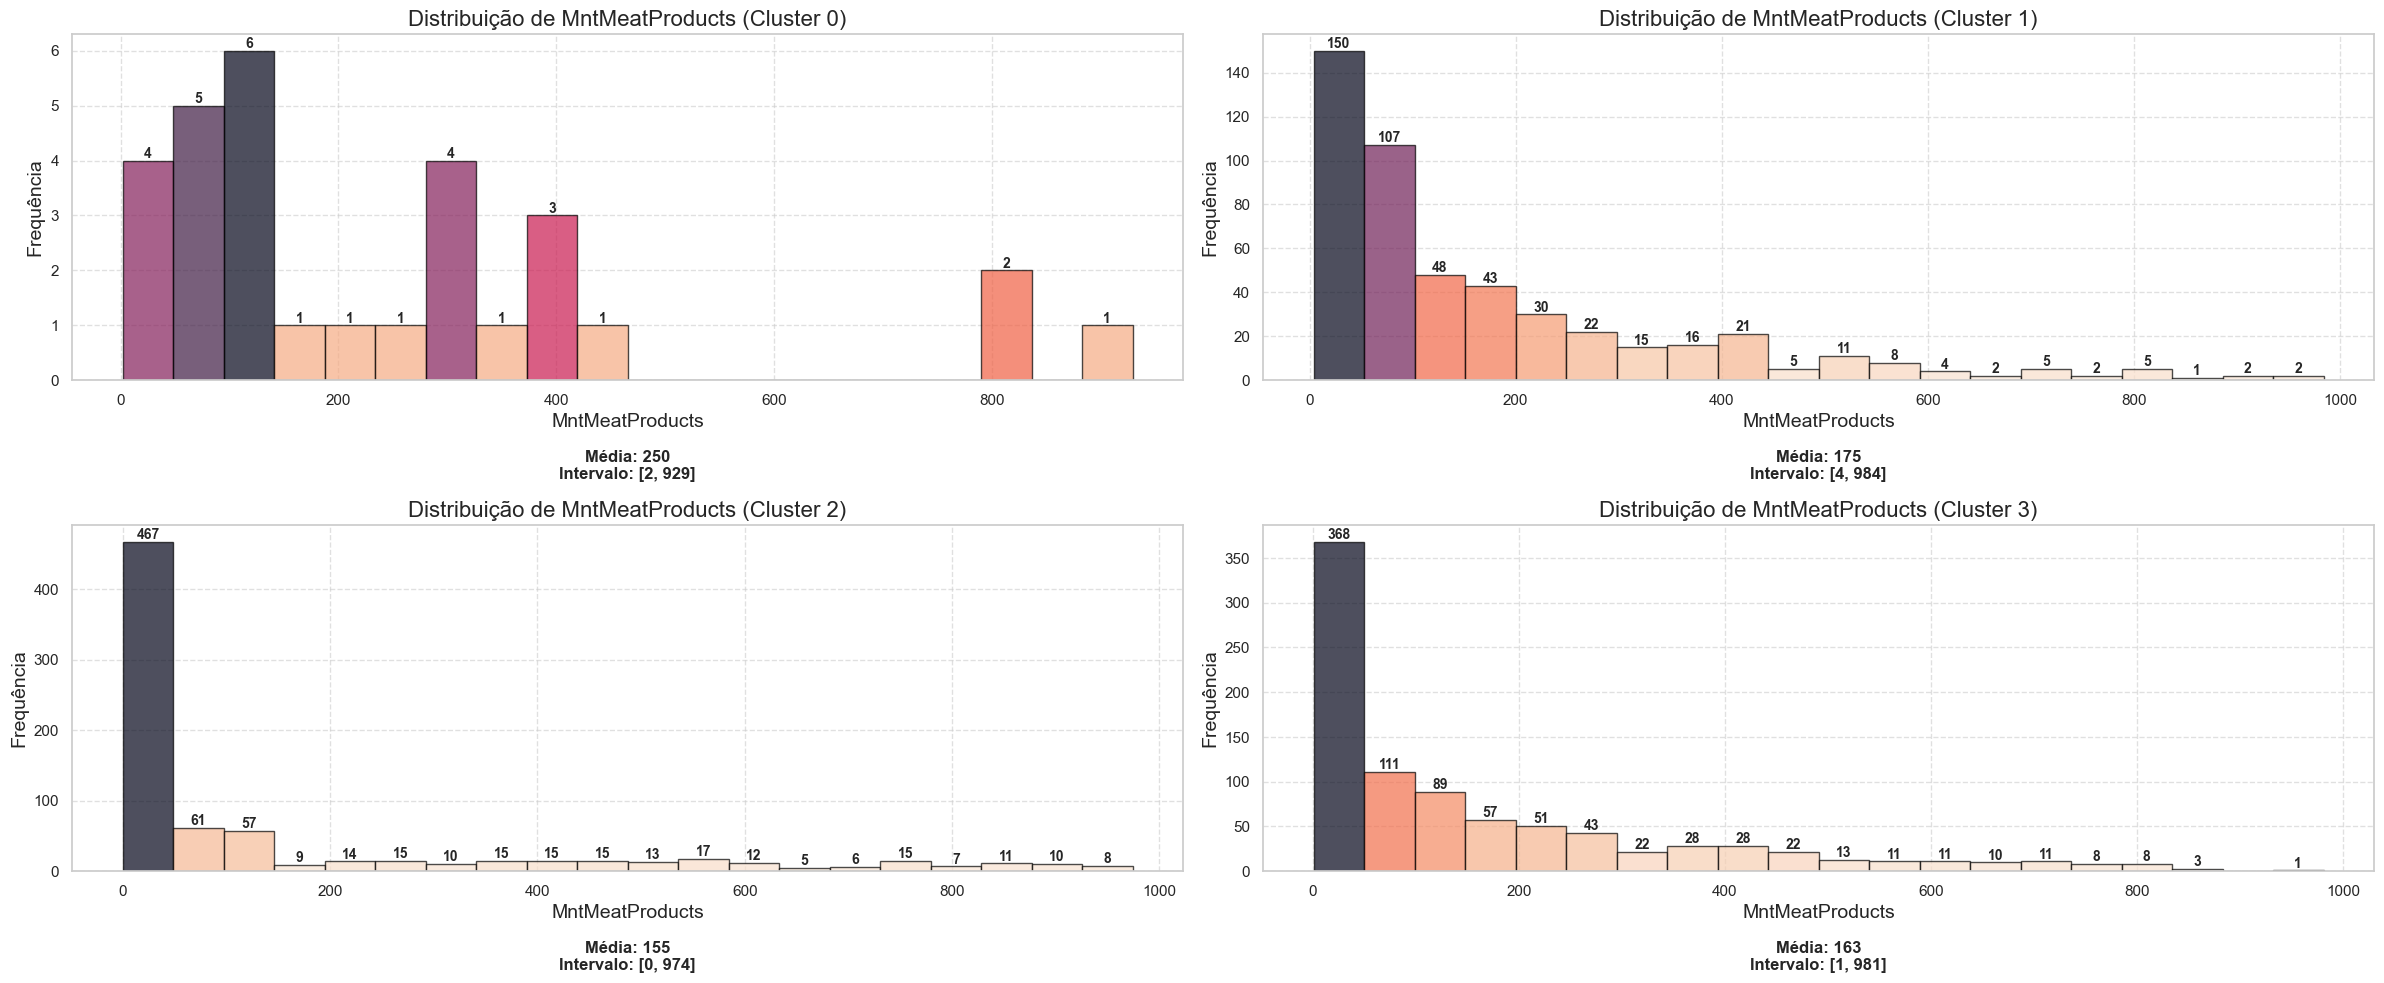

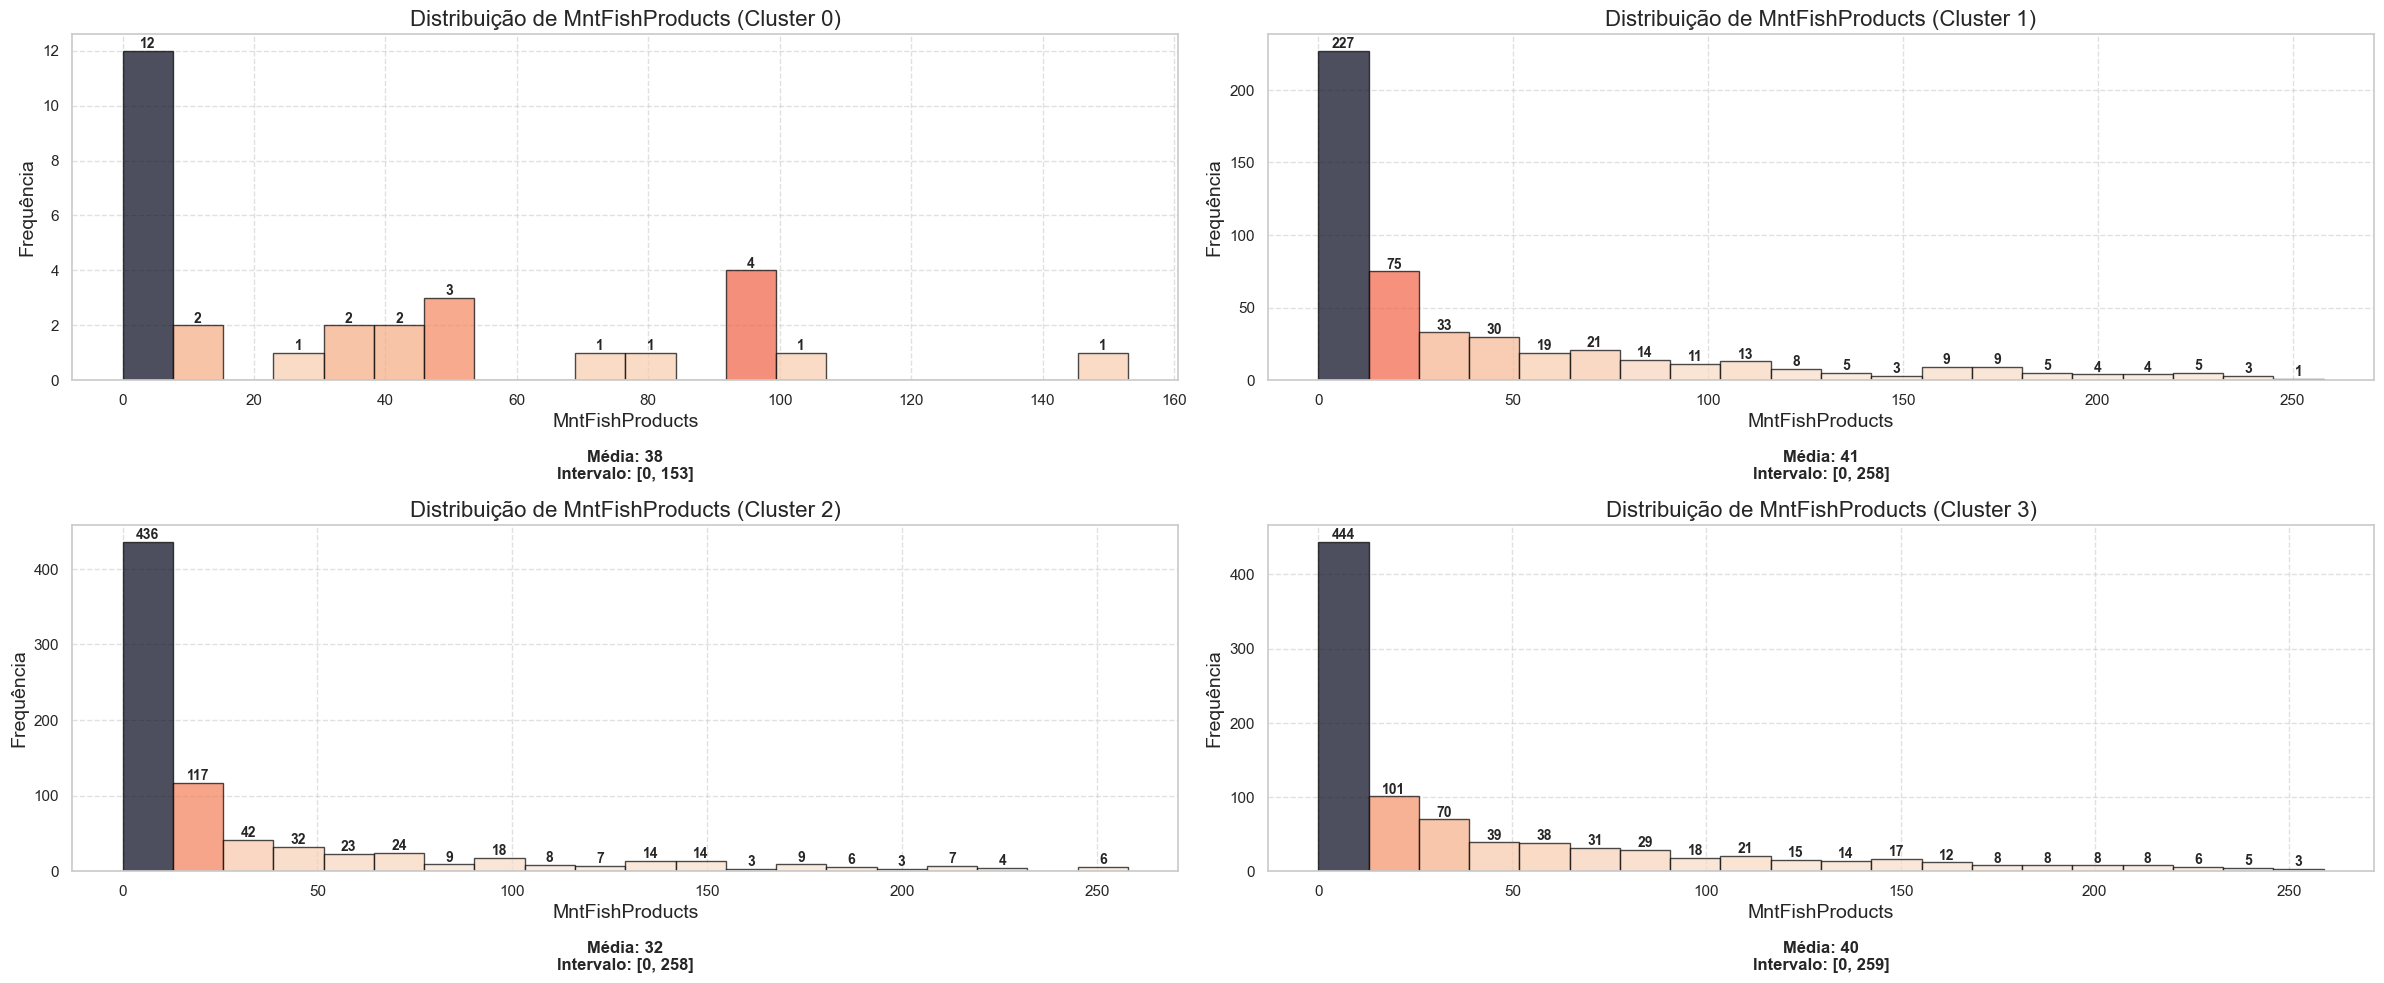

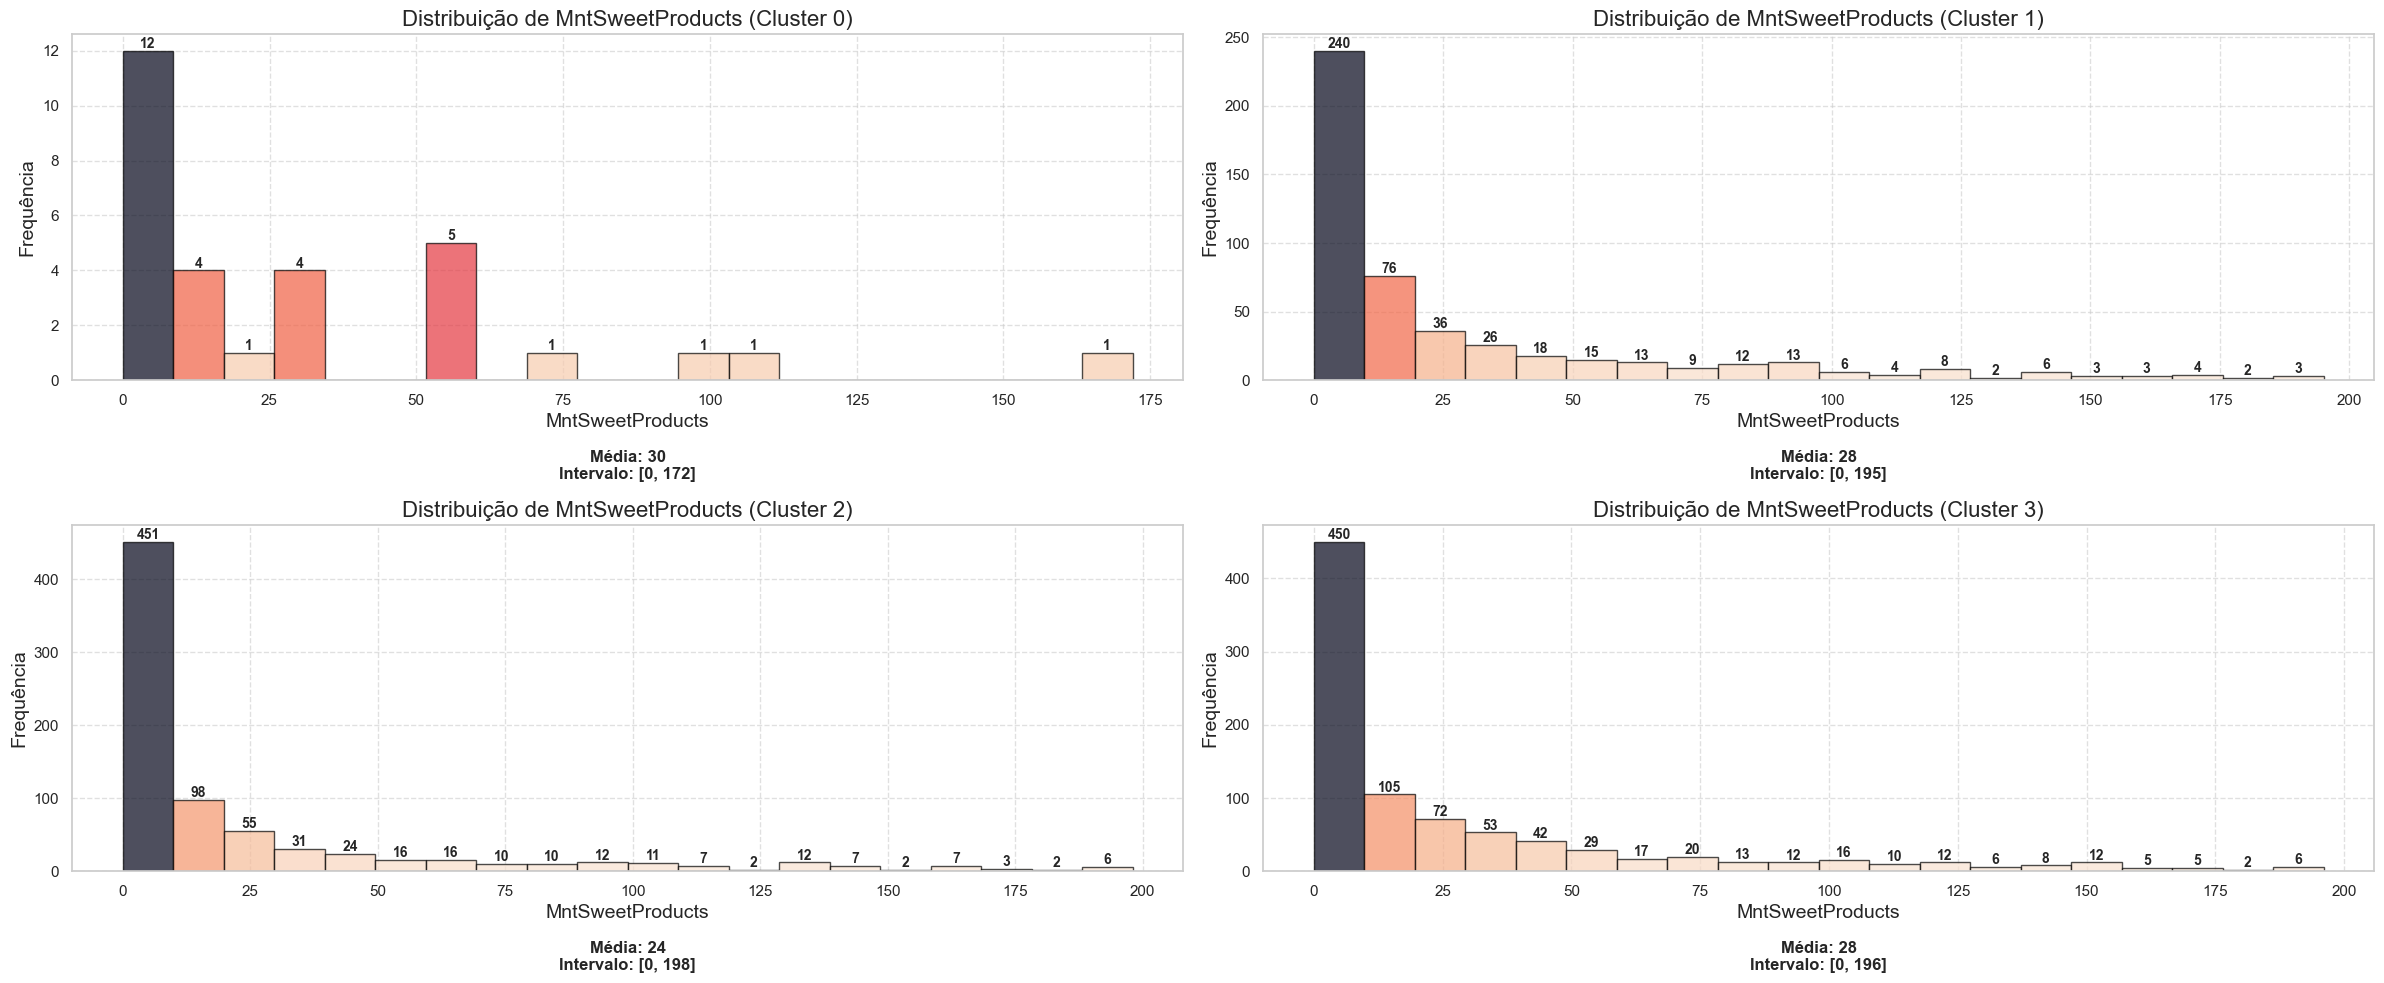

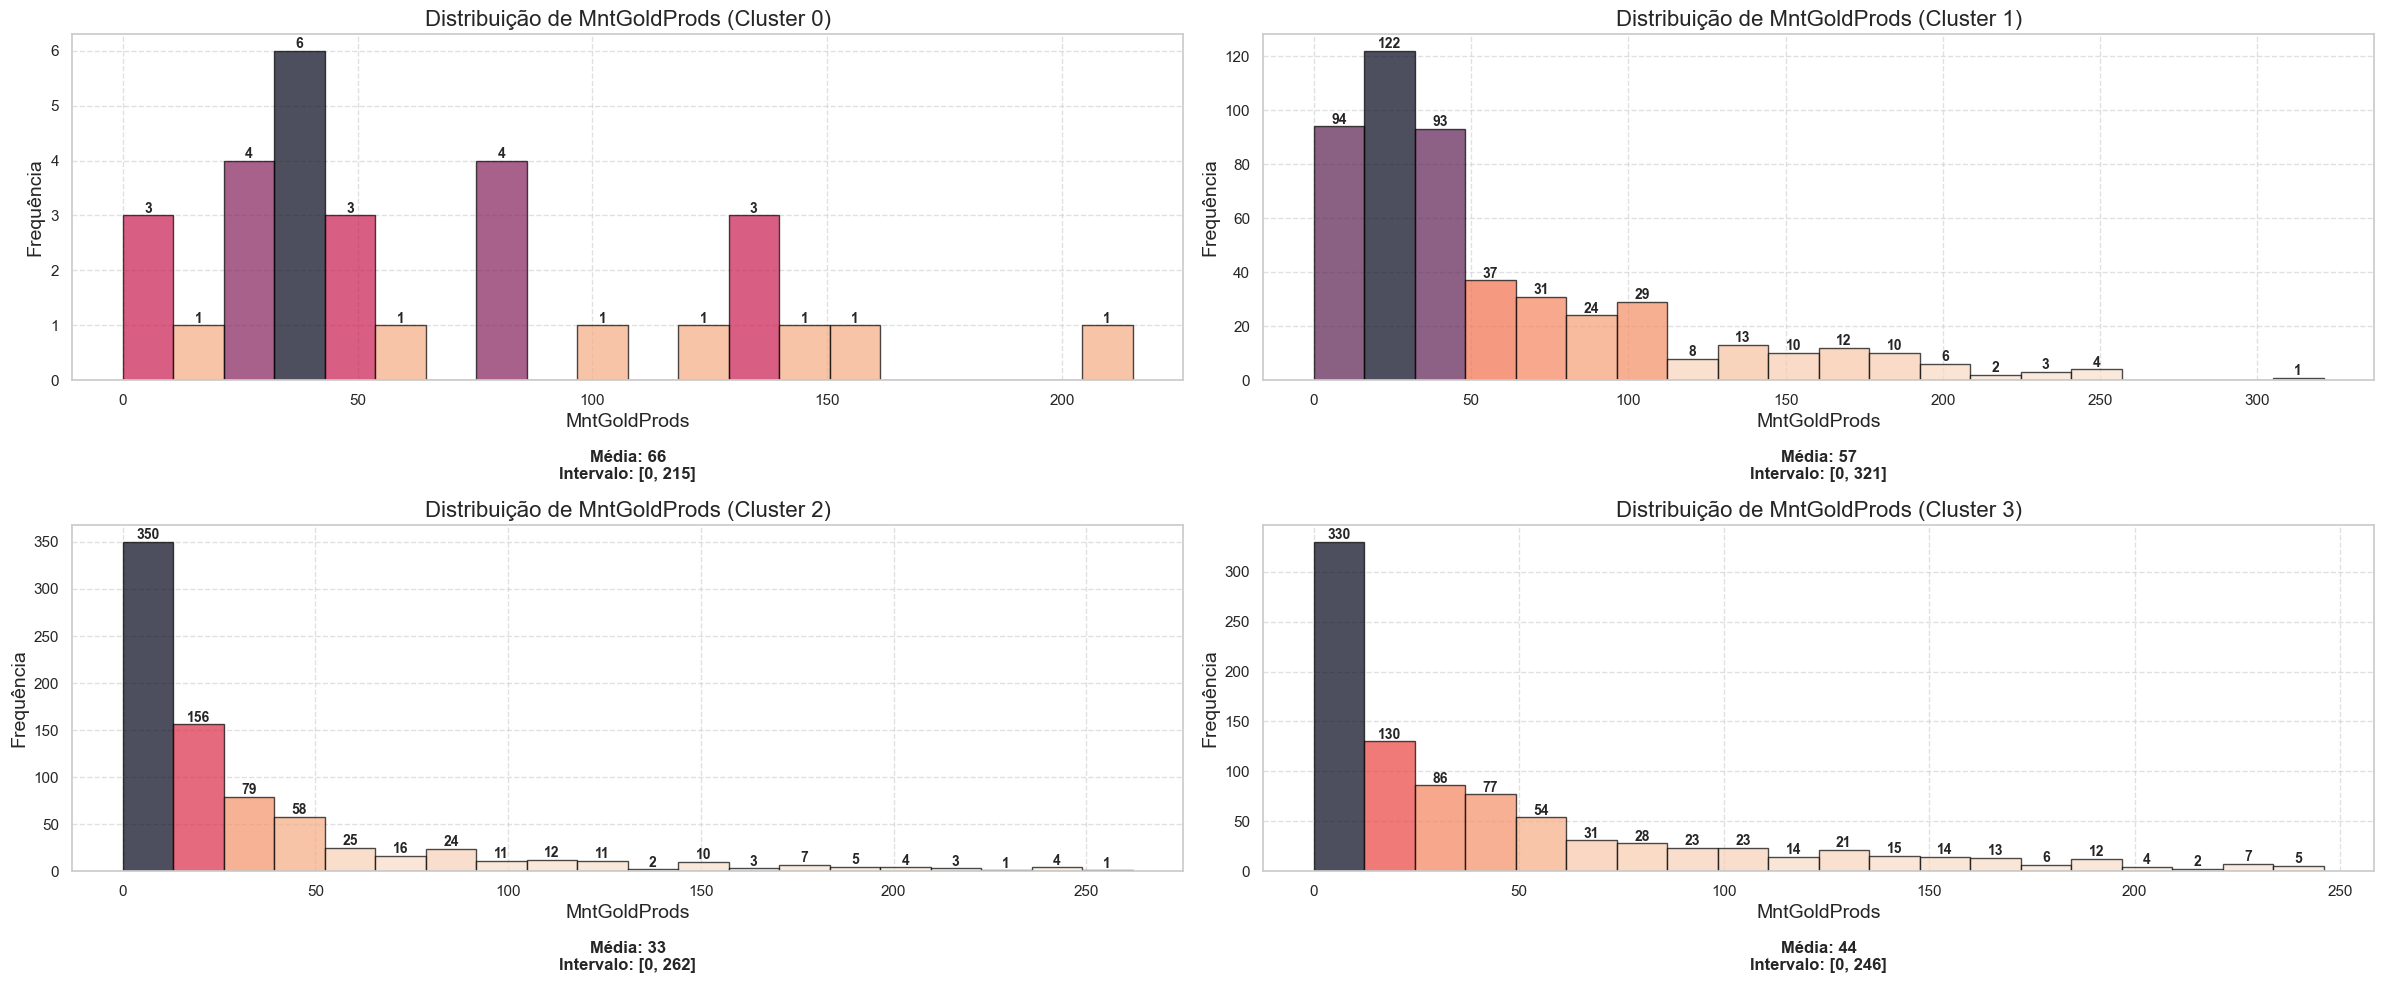

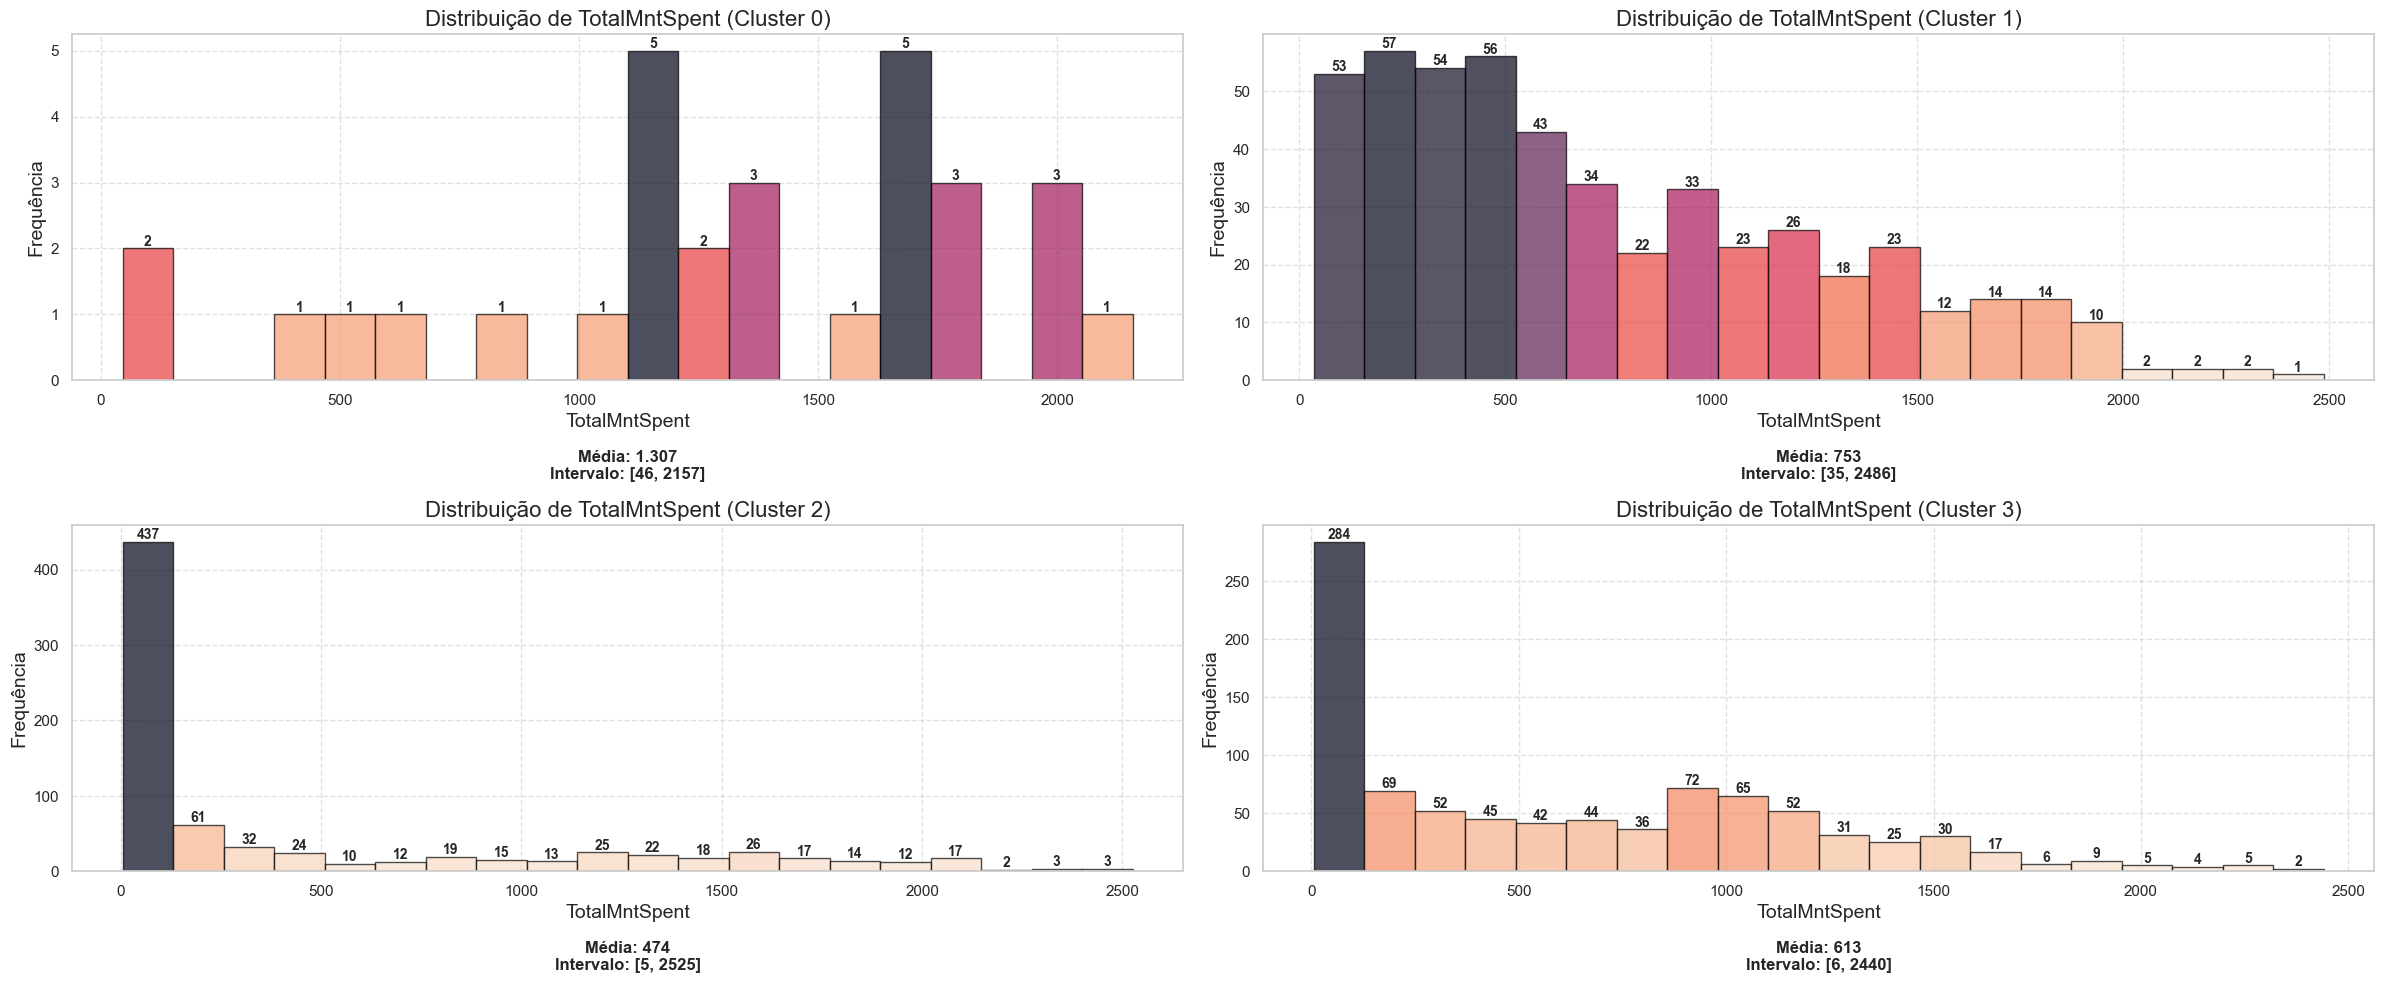

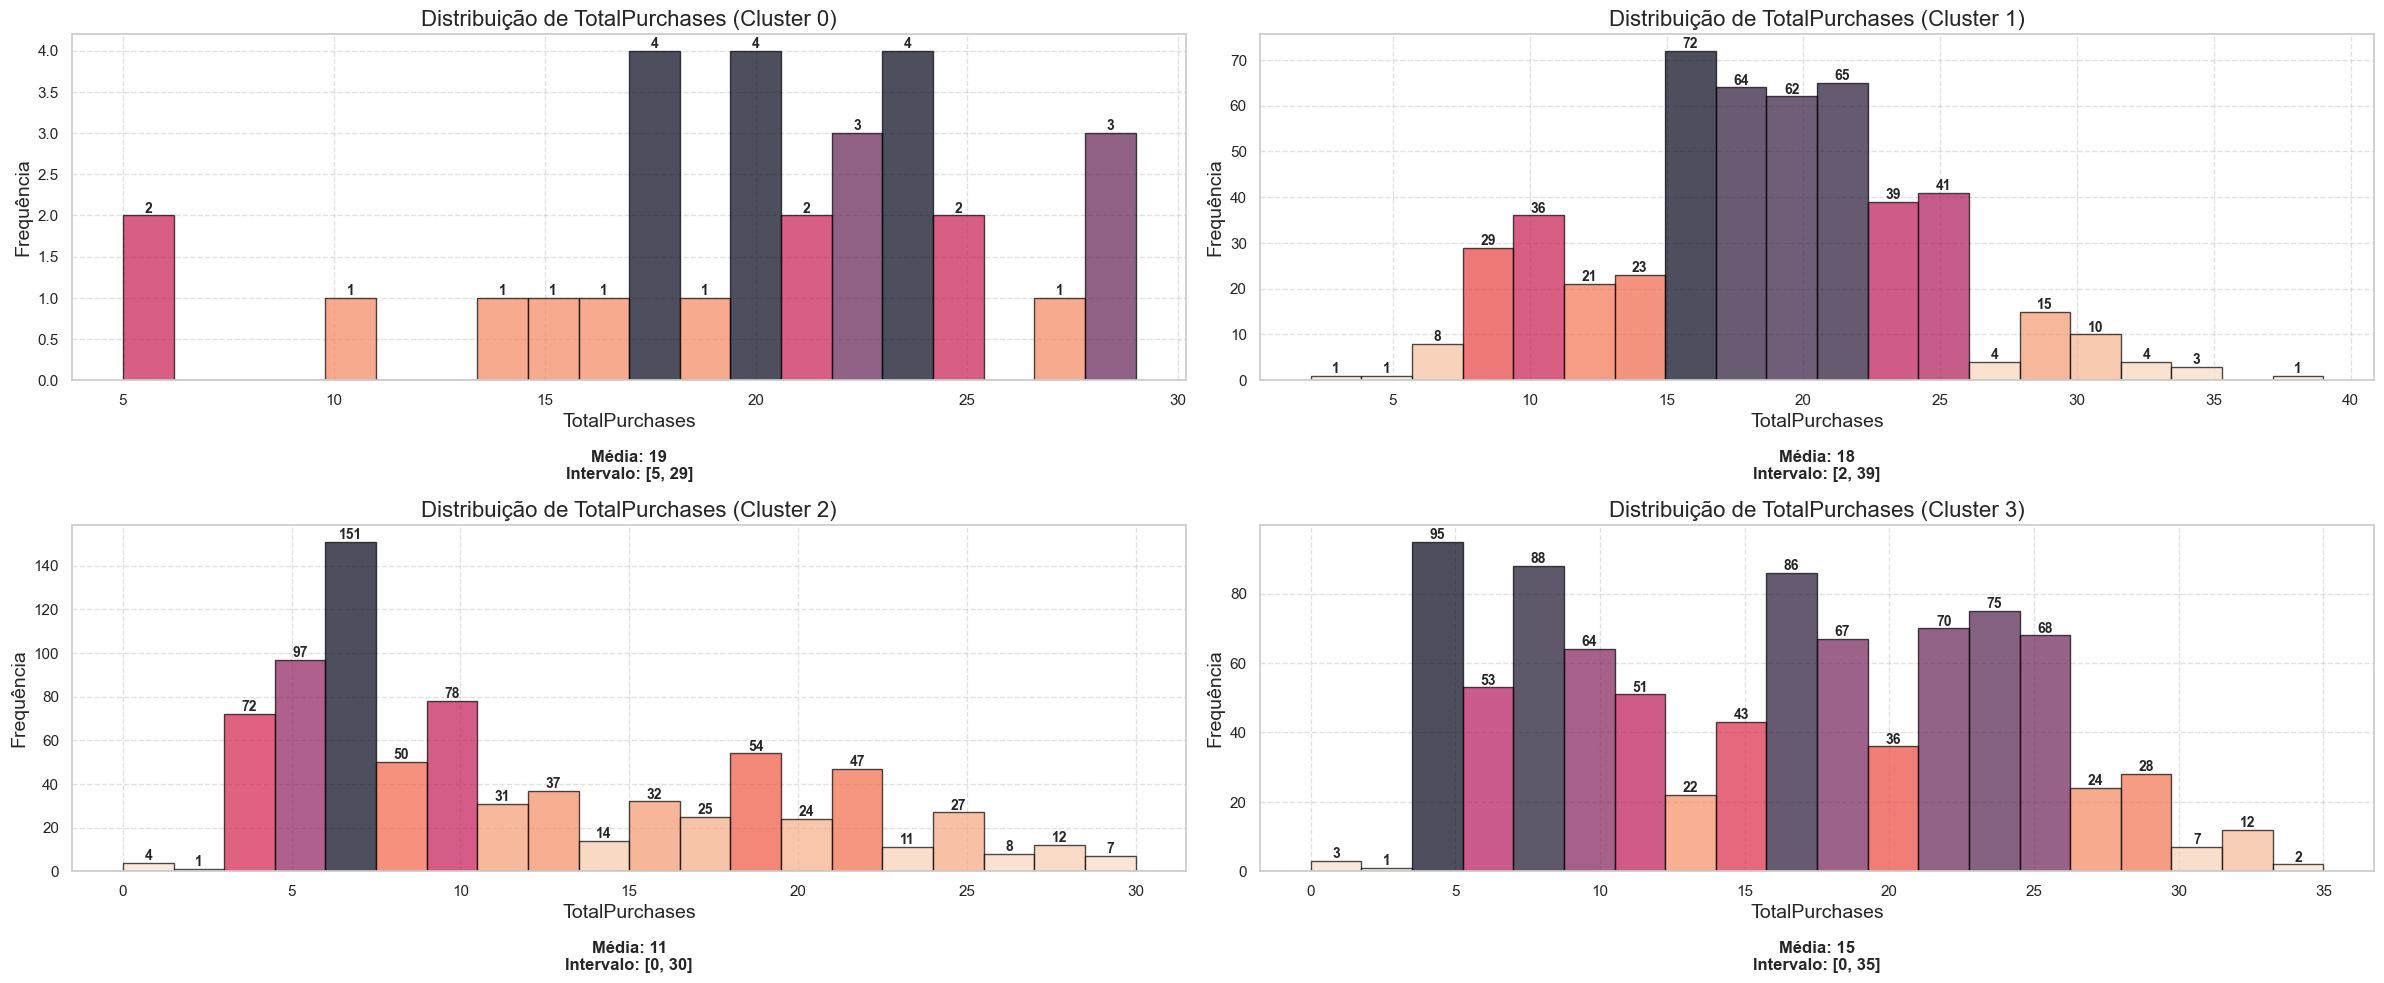

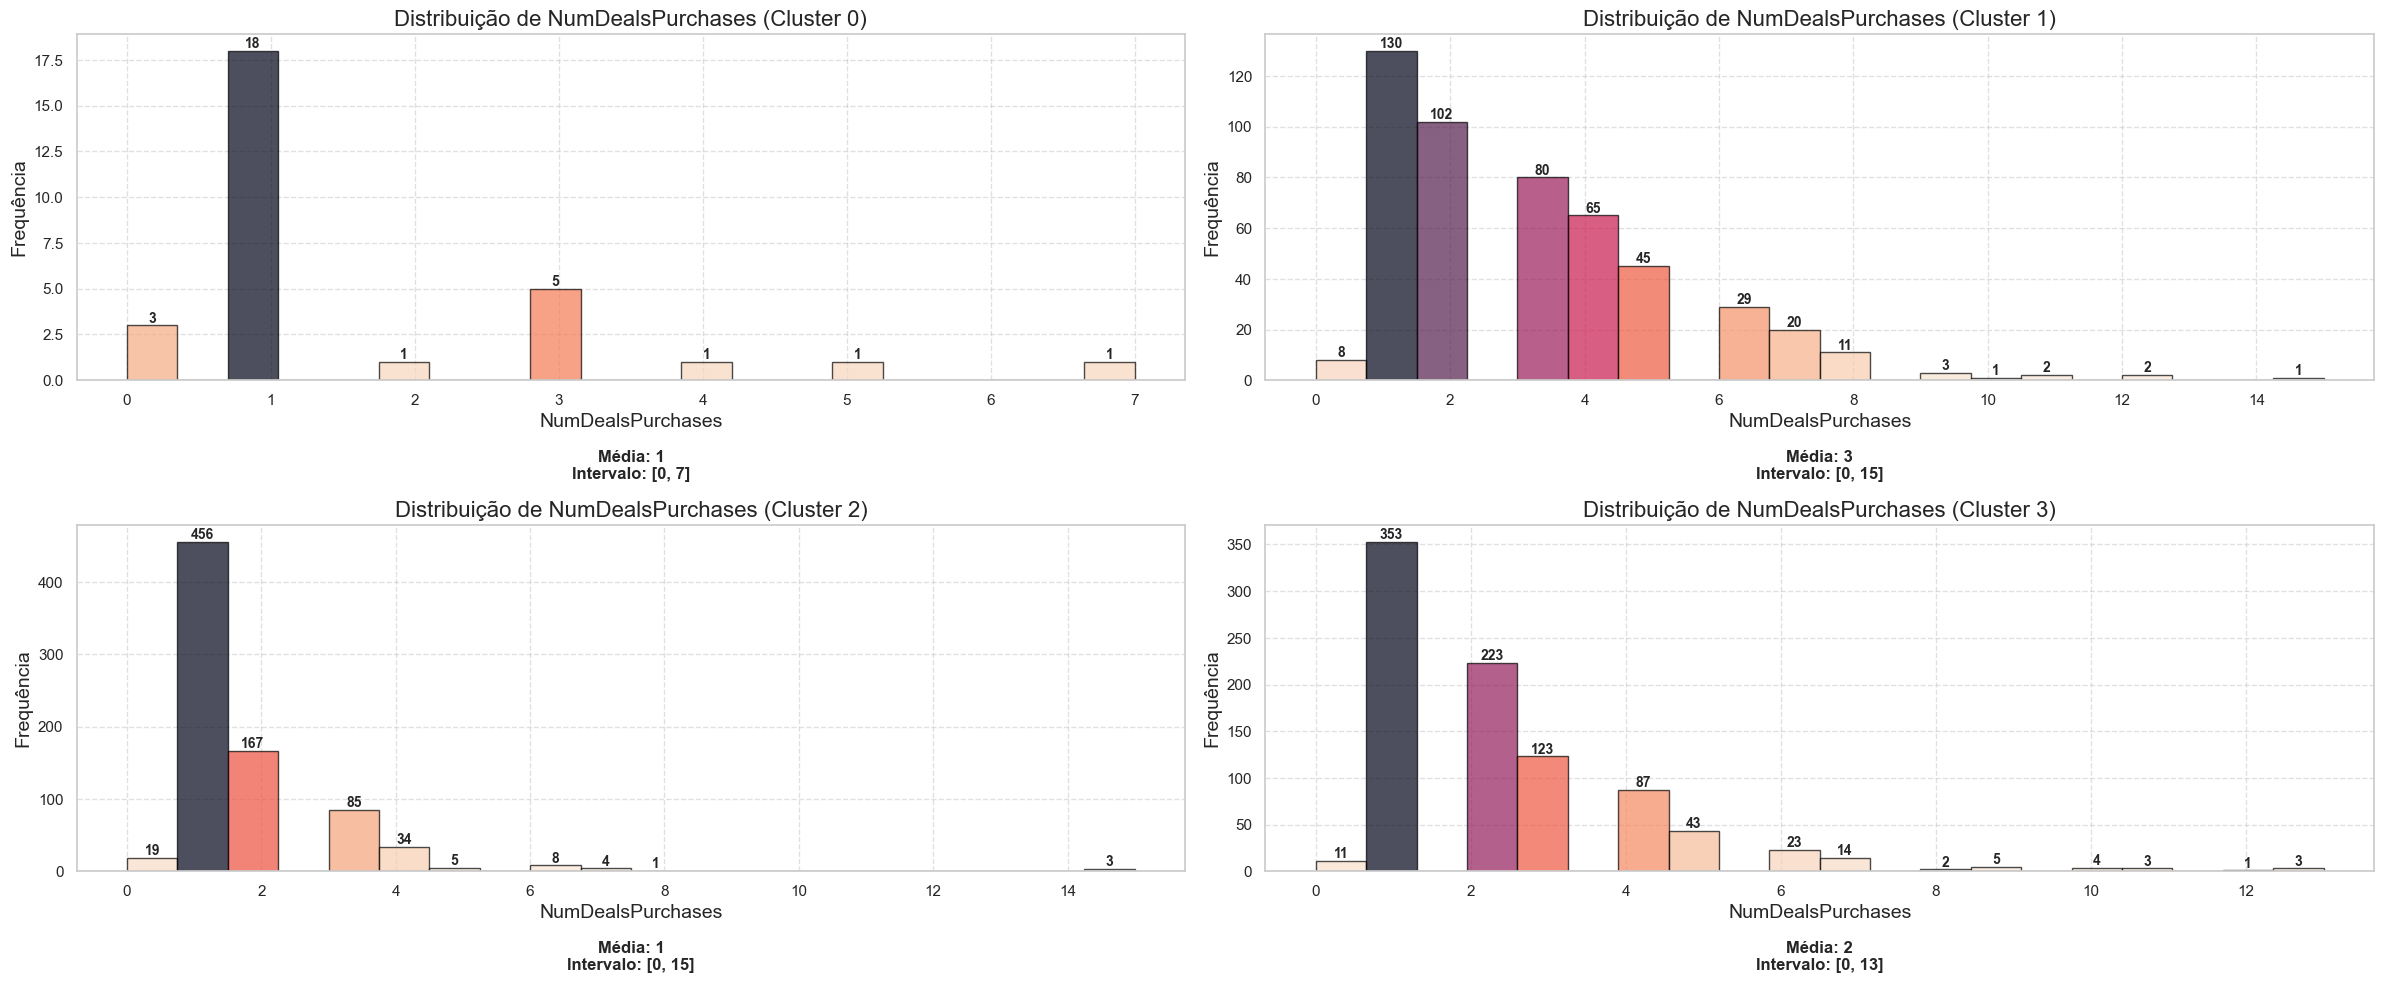

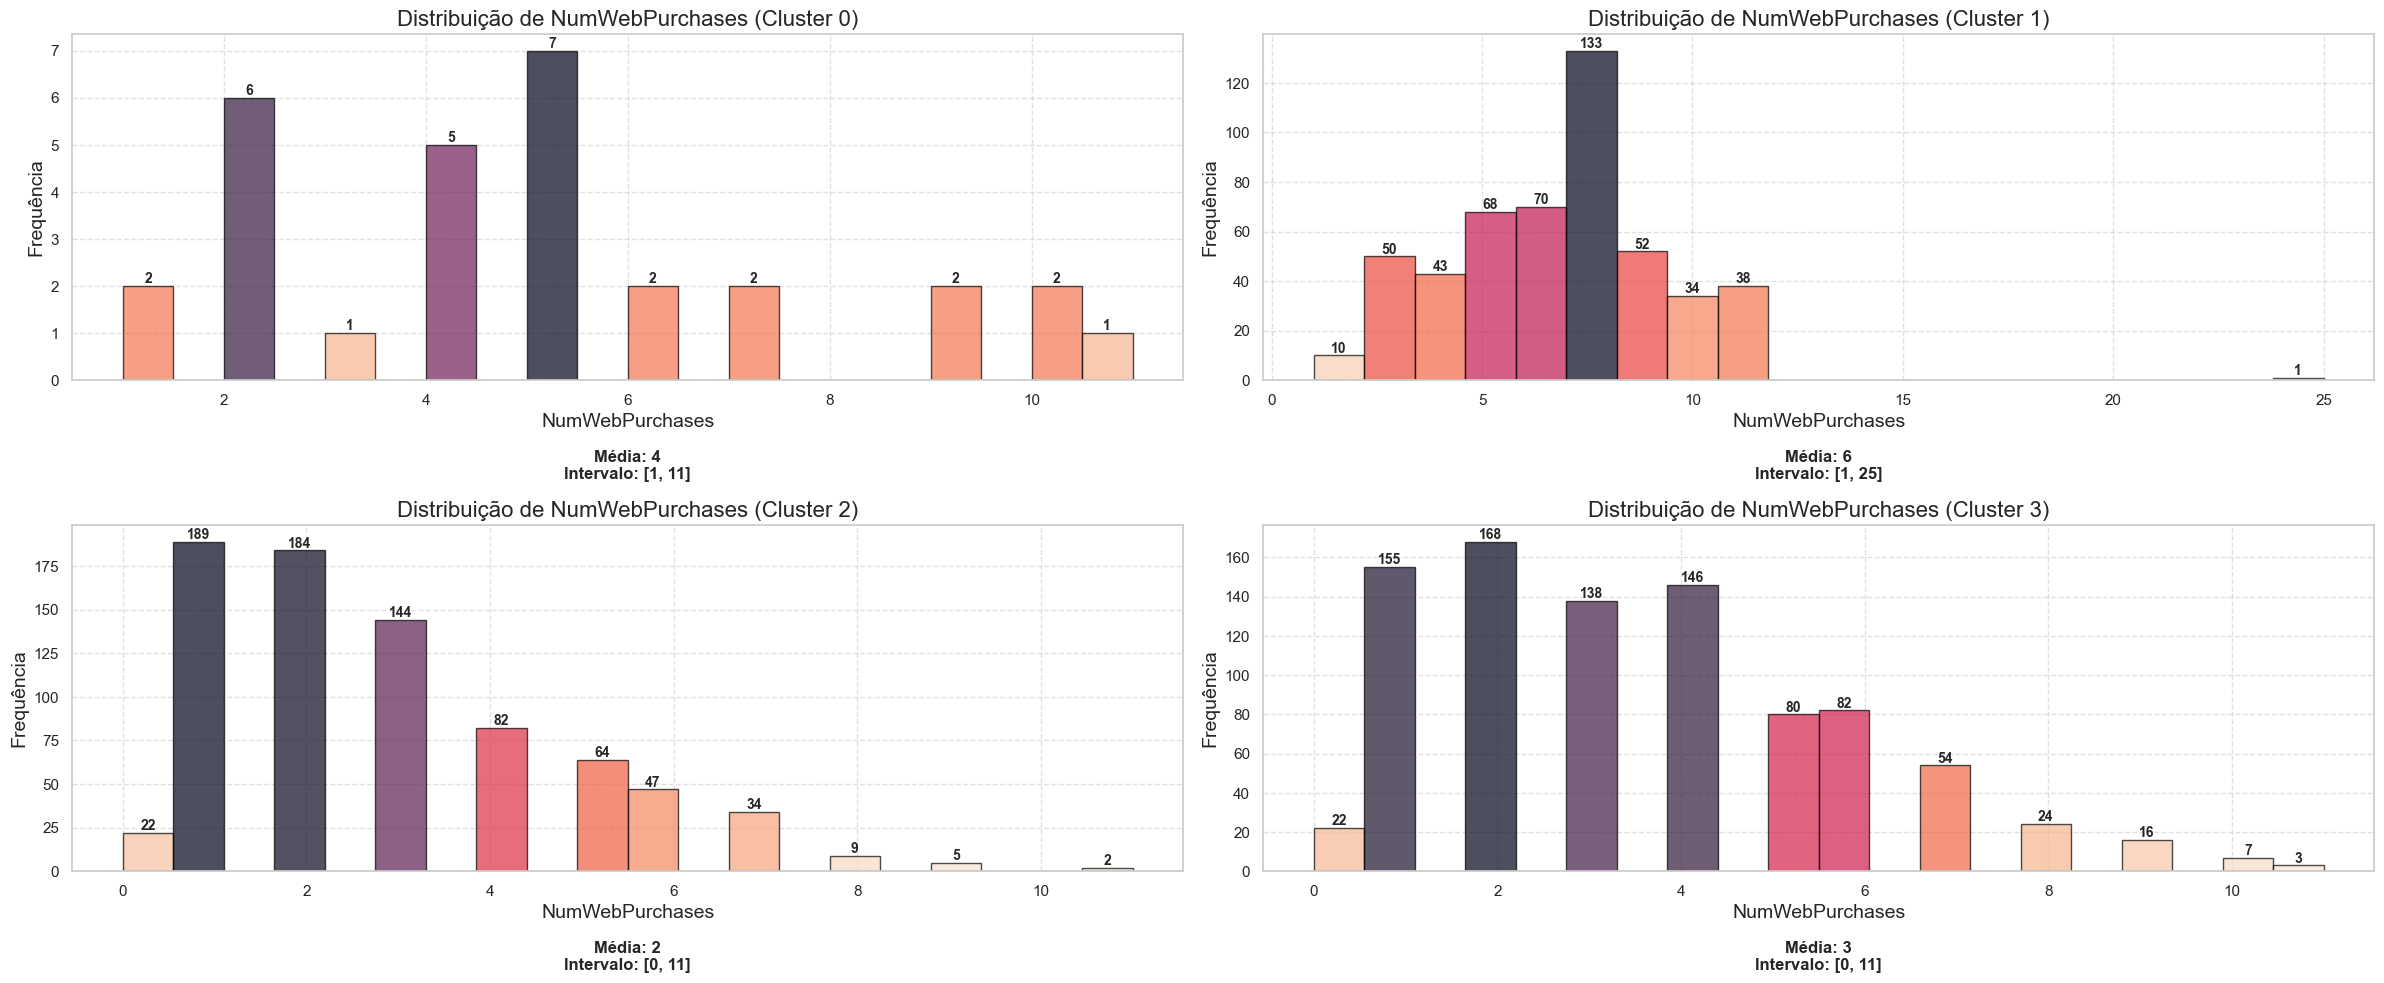

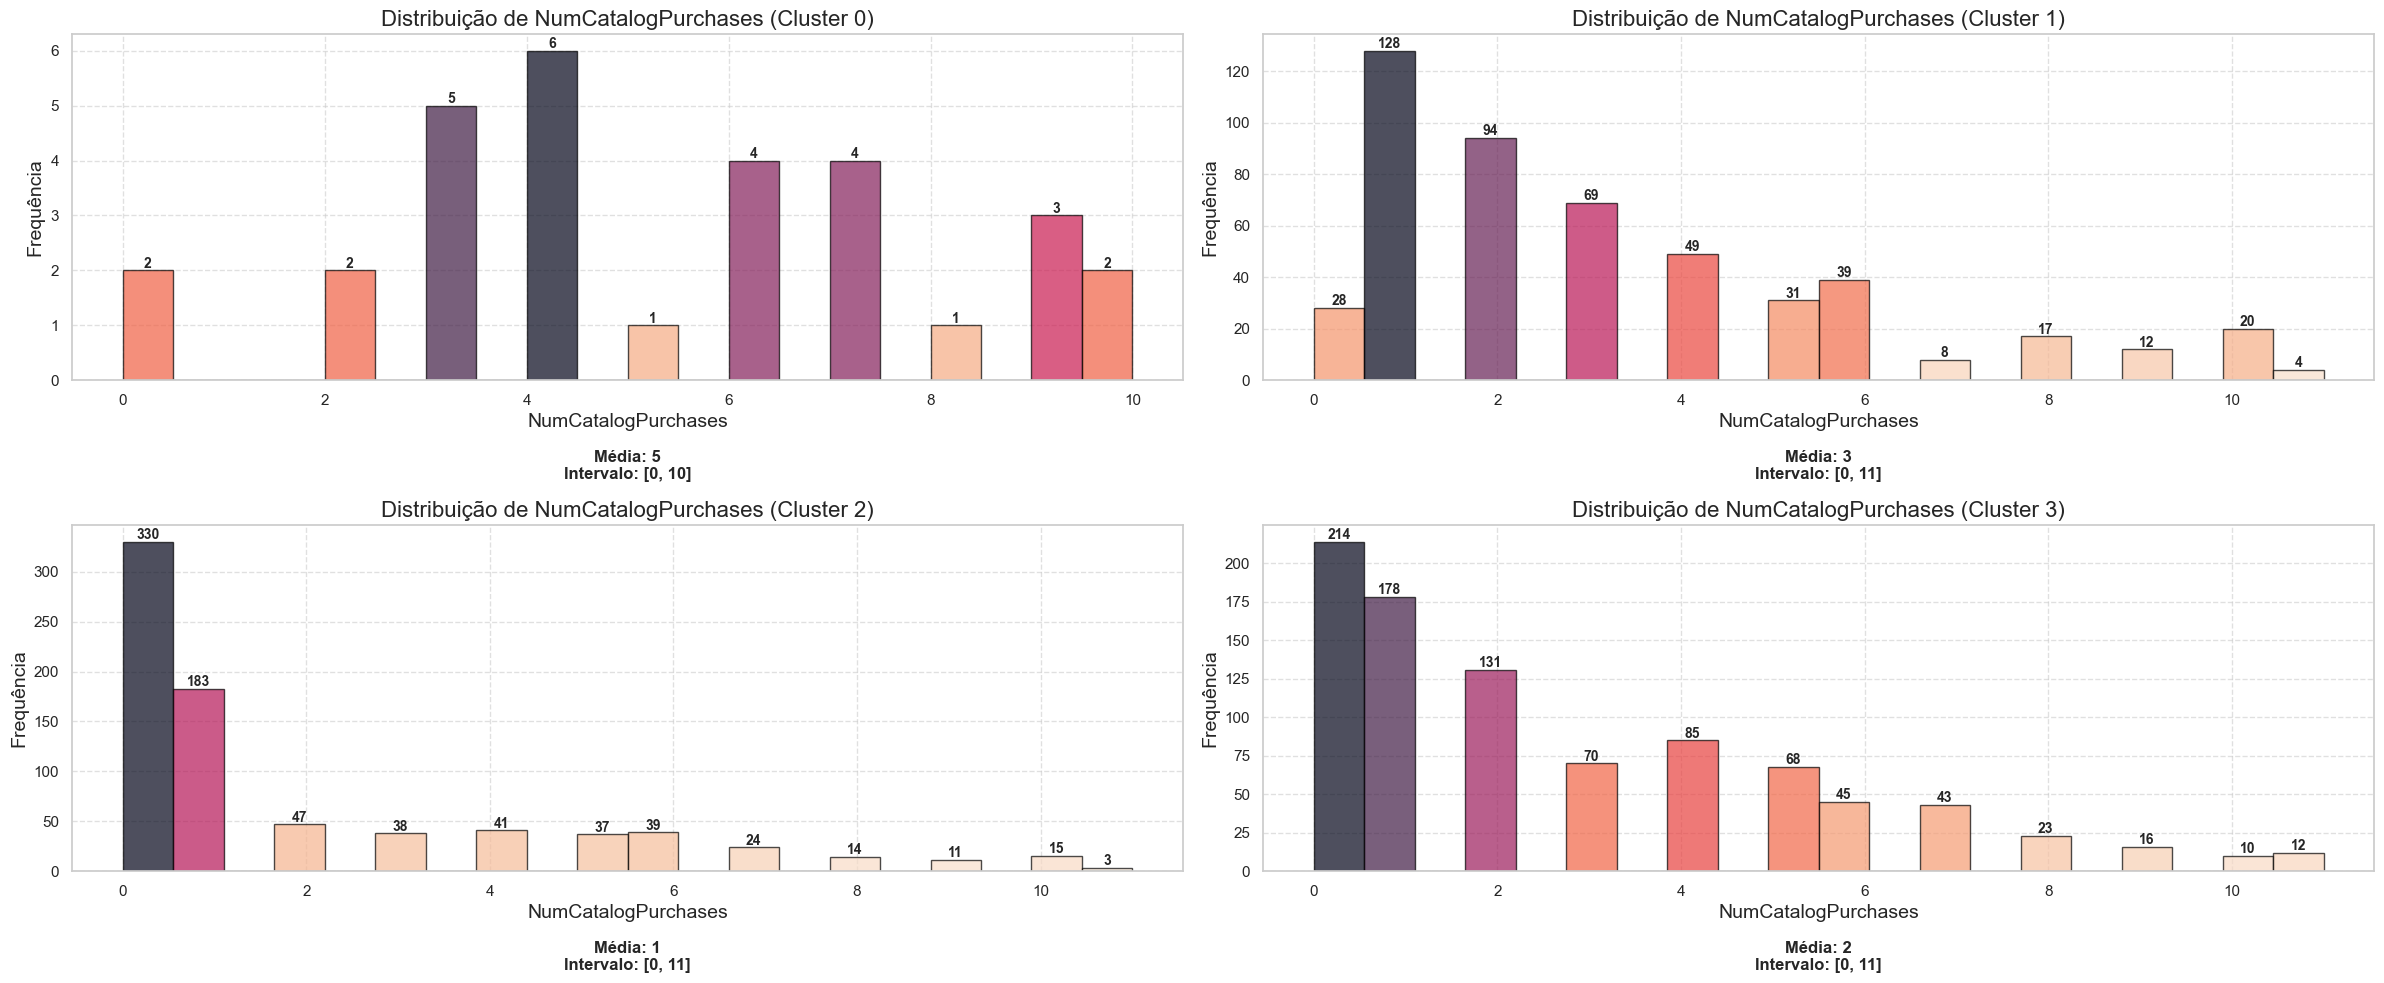

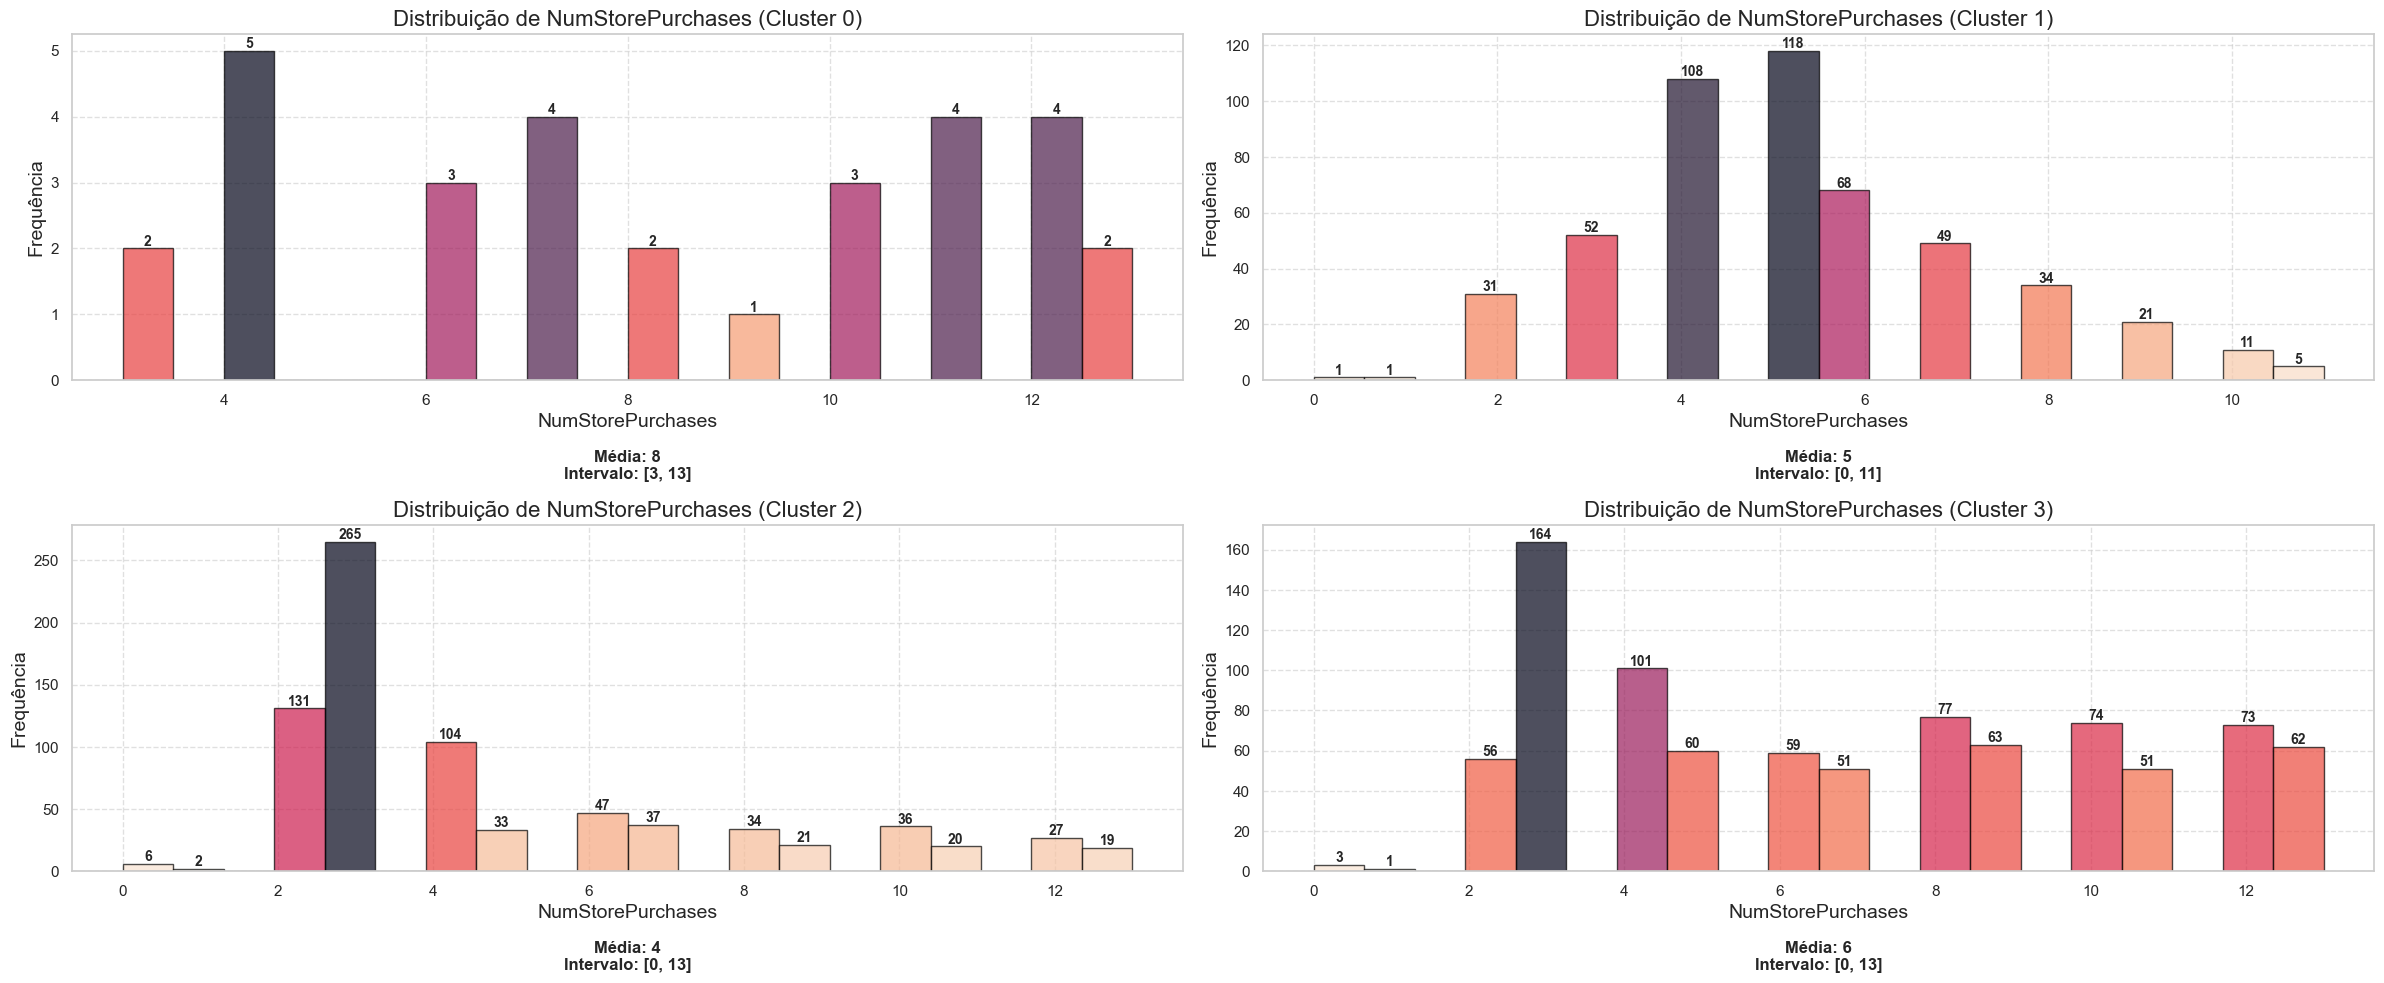

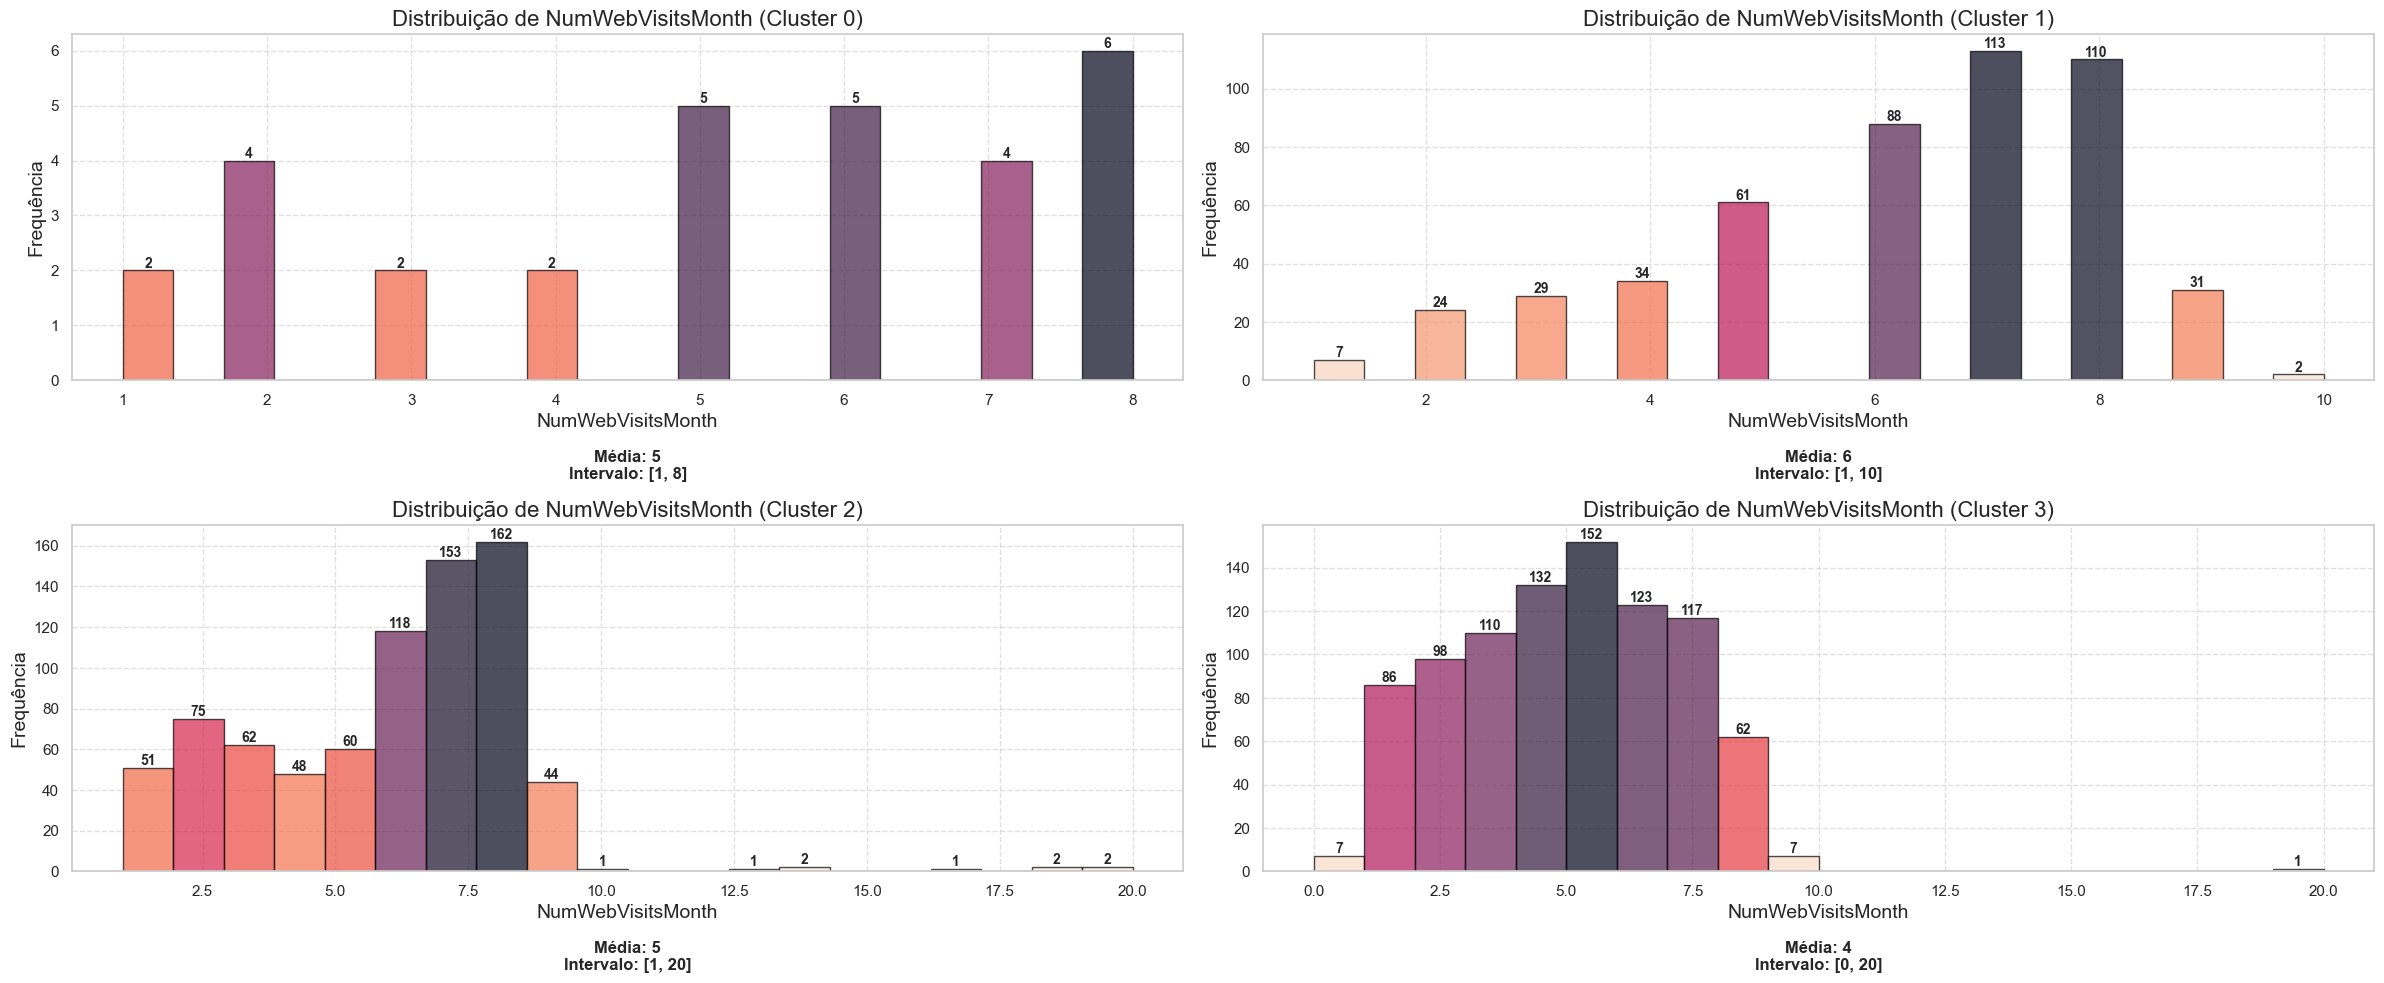

In [136]:
def plot_distribution_by_cluster(column):
    plt.figure(figsize=(24, 10))
    
    clusters = [0, 1, 2, 3]
    for i, cluster in enumerate(clusters, 1):
        plt.subplot(2, 2, i)
        cluster_data = df[df['Clusters'] == cluster]
        

        n, bins, patches = plt.hist(cluster_data[column], bins=20, color='blue', alpha=0.7, edgecolor='black')
        for j in range(len(patches)):
            patches[j].set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(n[j] / max(n)))
            if n[j] > 0:
                plt.text(patches[j].get_x() + patches[j].get_width() / 2, n[j], int(n[j]), 
                            ha='center', va='bottom', fontsize=10, fontweight='bold')
        plt.title(f'Distribuição de {column} (Cluster {cluster})', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequência', fontsize=14)
        
        plt.grid(True, linestyle='--', alpha=0.6)
        
        # Calcular a média e o intervalo dos valores
        mean_value = cluster_data[column].mean()
        min_value = cluster_data[column].min()
        max_value = cluster_data[column].max()
        
        # Adicionar a média e o intervalo abaixo do gráfico
        plt.text(0.5, -0.2, f'Média: {format(mean_value)}\nIntervalo: [{min_value}, {max_value}]', 
                 ha='center', va='top', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
    
    plt.tight_layout()
    plt.show()

lista = ['Income', 'Age', 'Recency', 'MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'TotalMntSpent', 'TotalPurchases',
        'NumDealsPurchases',  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

for col in lista:
    plot_distribution_by_cluster(col)

## Comparação dos Clusters em variáveis numéricas - (Gráfico de Radar)

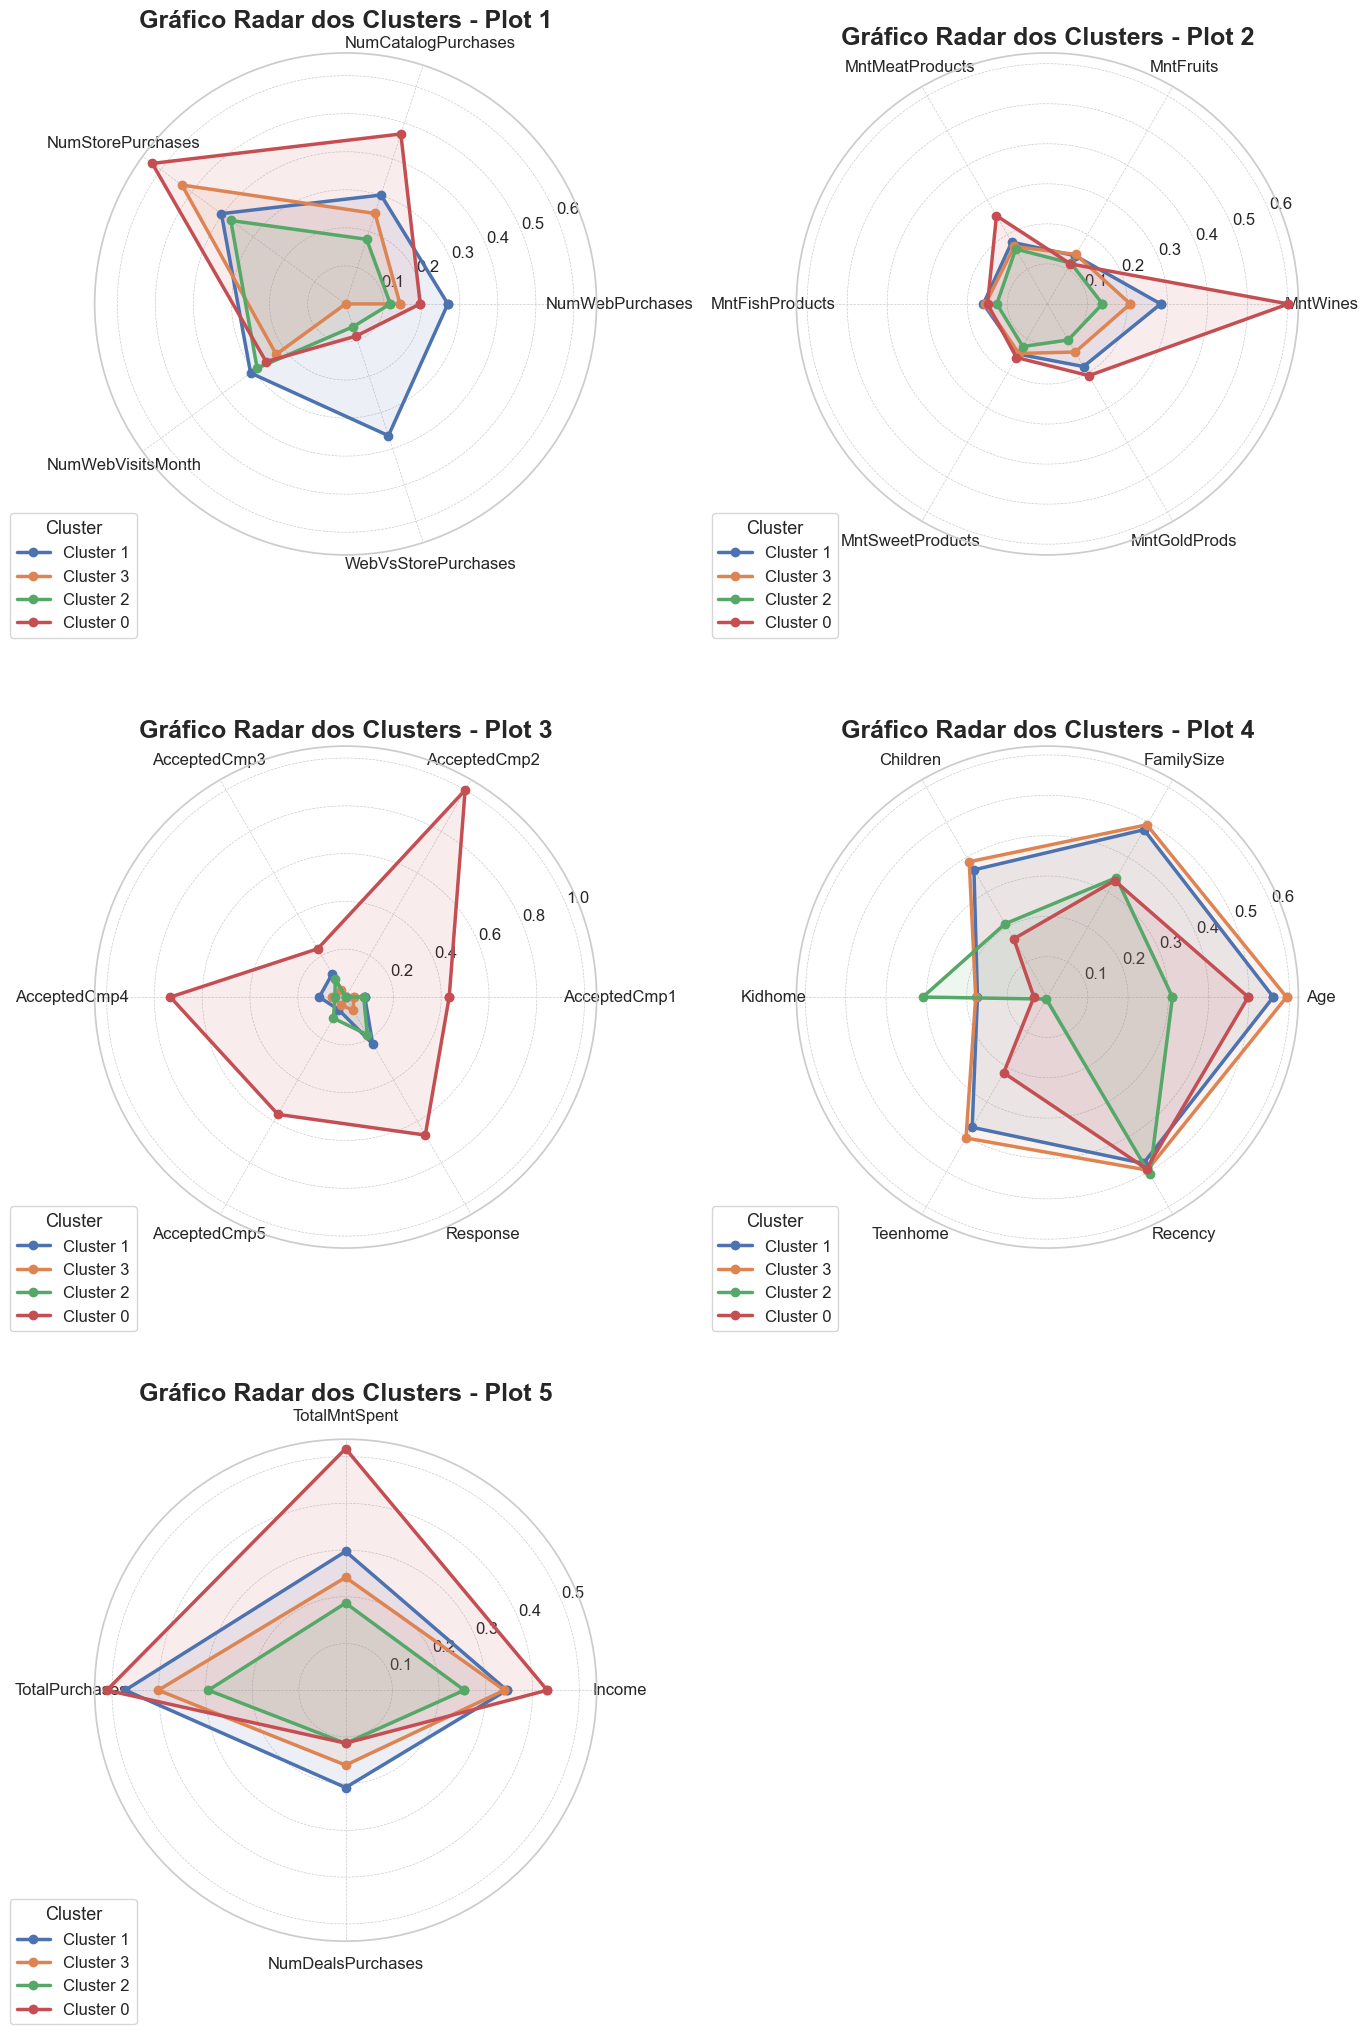

In [137]:
def radar(multiple_columns):
    # Definir o estilo do Seaborn
    sns.set(style='whitegrid')
    
    # Selecionar as colunas de interesse
    clusters = df['Clusters'].unique()

    # Normalizar os dados
    df_normalized = df.copy()
    for columns in multiple_columns:
        for column in columns:
            df_normalized[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

    # Criar o gráfico de Radar
    num_plots = len(multiple_columns)
    num_rows = (num_plots + 1) // 2
    fig, axs = plt.subplots(num_rows, 2, figsize=(14, 7 * num_rows), subplot_kw=dict(polar=True))

    axs = axs.flatten()

    for idx, columns in enumerate(multiple_columns):
        data = []
        for cluster in clusters:
            cluster_data = df_normalized[df_normalized['Clusters'] == cluster][columns].mean().tolist()
            data.append(cluster_data)

        N = len(columns)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        ax = axs[idx]
        for i, cluster_data in enumerate(data):
            values = cluster_data + cluster_data[:1]
            ax.plot(angles, values, linewidth=2.5, linestyle='solid', marker='o', label=f'Cluster {clusters[i]}')
            ax.fill(angles, values, alpha=0.1)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(columns, fontsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax.set_title(f'Gráfico Radar dos Clusters - Plot {idx+1}', fontsize=18, fontweight='bold')
        ax.legend(title='Cluster', title_fontsize='13', fontsize='12', loc='upper right', bbox_to_anchor=(0.1, 0.1))
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Rimuovere eventuali subplot vuoti
    for j in range(idx + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout(pad=2.0)
    plt.show()

# Exemplo de uso
radar([
    ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'WebVsStorePurchases'],
    ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
    ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'],
    ['Age', 'FamilySize', 'Children', 'Kidhome', 'Teenhome', 'Recency'],
    ['Income', 'TotalMntSpent', 'TotalPurchases', 'NumDealsPurchases']
])

## Comparação dos Clusters em variáveis categóricas - (Gráfico de Radar)

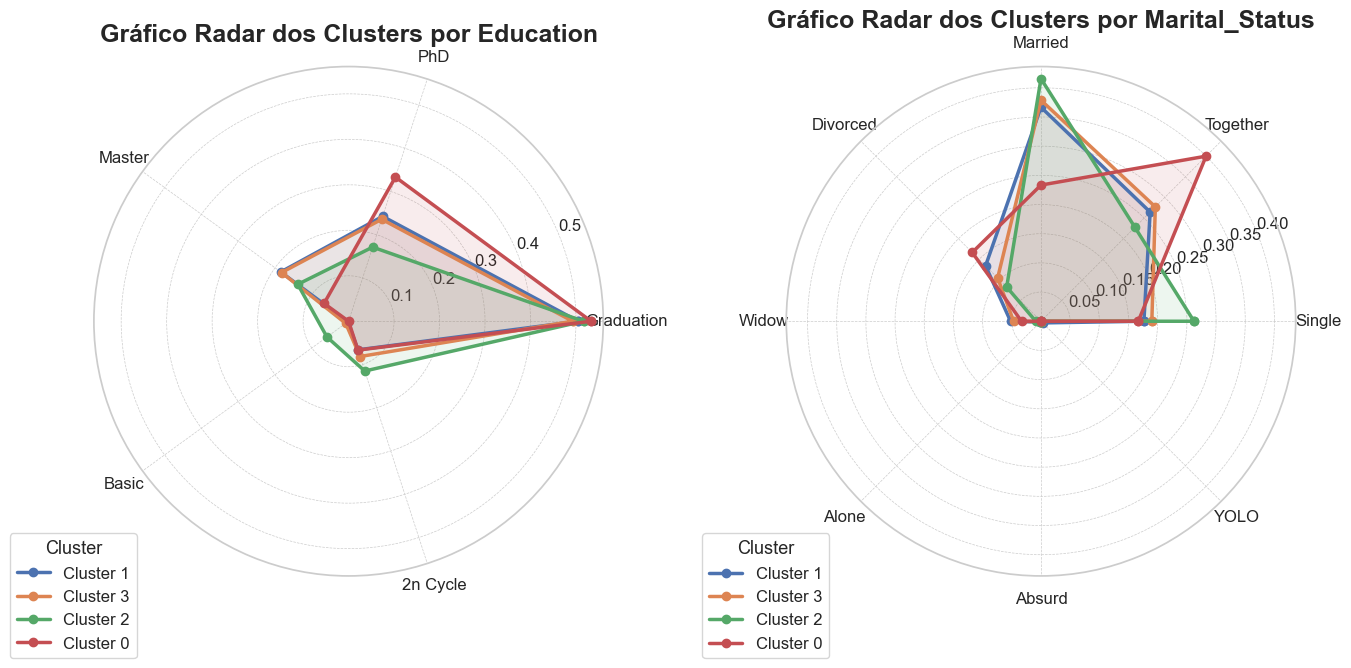

In [138]:
def radar_categorical(columns):
    # Definir o estilo do Seaborn
    sns.set(style='whitegrid')
    
    # Selecionar os clusters únicos
    clusters = df['Clusters'].unique()

    num_plots = len(columns)
    num_rows = (num_plots + 1) // 2
    fig, axs = plt.subplots(num_rows, 2, figsize=(14, 7 * num_rows), subplot_kw=dict(polar=True))

    axs = axs.flatten()

    for idx, column in enumerate(columns):
        categories = df[column].unique()
        
        # Preparar os dados para o gráfico de Radar
        data = []
        for cluster in clusters:
            cluster_data = []
            for category in categories:
                category_freq = df[(df['Clusters'] == cluster) & (df[column] == category)].shape[0] / df[df['Clusters'] == cluster].shape[0]
                cluster_data.append(category_freq)
            data.append(cluster_data)

        # Criar o gráfico de Radar
        N = len(categories)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        ax = axs[idx]
        for i, cluster_data in enumerate(data):
            values = cluster_data + cluster_data[:1]
            ax.plot(angles, values, linewidth=2.5, linestyle='solid', marker='o', label=f'Cluster {clusters[i]}')
            ax.fill(angles, values, alpha=0.1)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax.set_title(f'Gráfico Radar dos Clusters por {column}', fontsize=18, fontweight='bold')
        ax.legend(title='Cluster', title_fontsize='13', fontsize='12', loc='upper right', bbox_to_anchor=(0.1, 0.1))
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Rimuovere eventuali subplot vuoti
    for j in range(idx + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout(pad=2.0)
    plt.show()

# Exemplo de uso
radar_categorical(['Education', 'Marital_Status'])

## Relação de renda e valor médio gasto em produtos nos últimos dois anos (Gráfico de Dispersão)

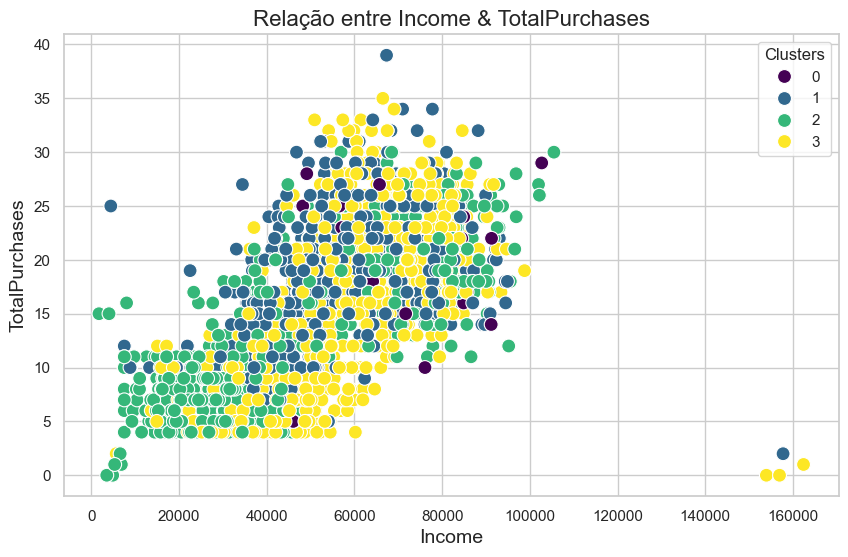

In [139]:
def dispersion(col1, col2, hue=None):
    # Definir o estilo do gráfico
    sns.set(style="whitegrid")

    # Criar o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col1, y=col2, hue=hue, palette='viridis', s=100)

    # Adicionar título e rótulos aos eixos
    plt.title(f'Relação entre {col1} & {col2}', fontsize=16)
    plt.xlabel(col1, fontsize=14)
    plt.ylabel(col2, fontsize=14)

    # Adicionar uma grade
    plt.grid(True)

    # Mostrar o gráfico
    plt.show()

dispersion('Income', 'TotalPurchases', 'Clusters')

## Intervalo de valores para cada Cluster - (Referente às variáveis ​​demográficas)

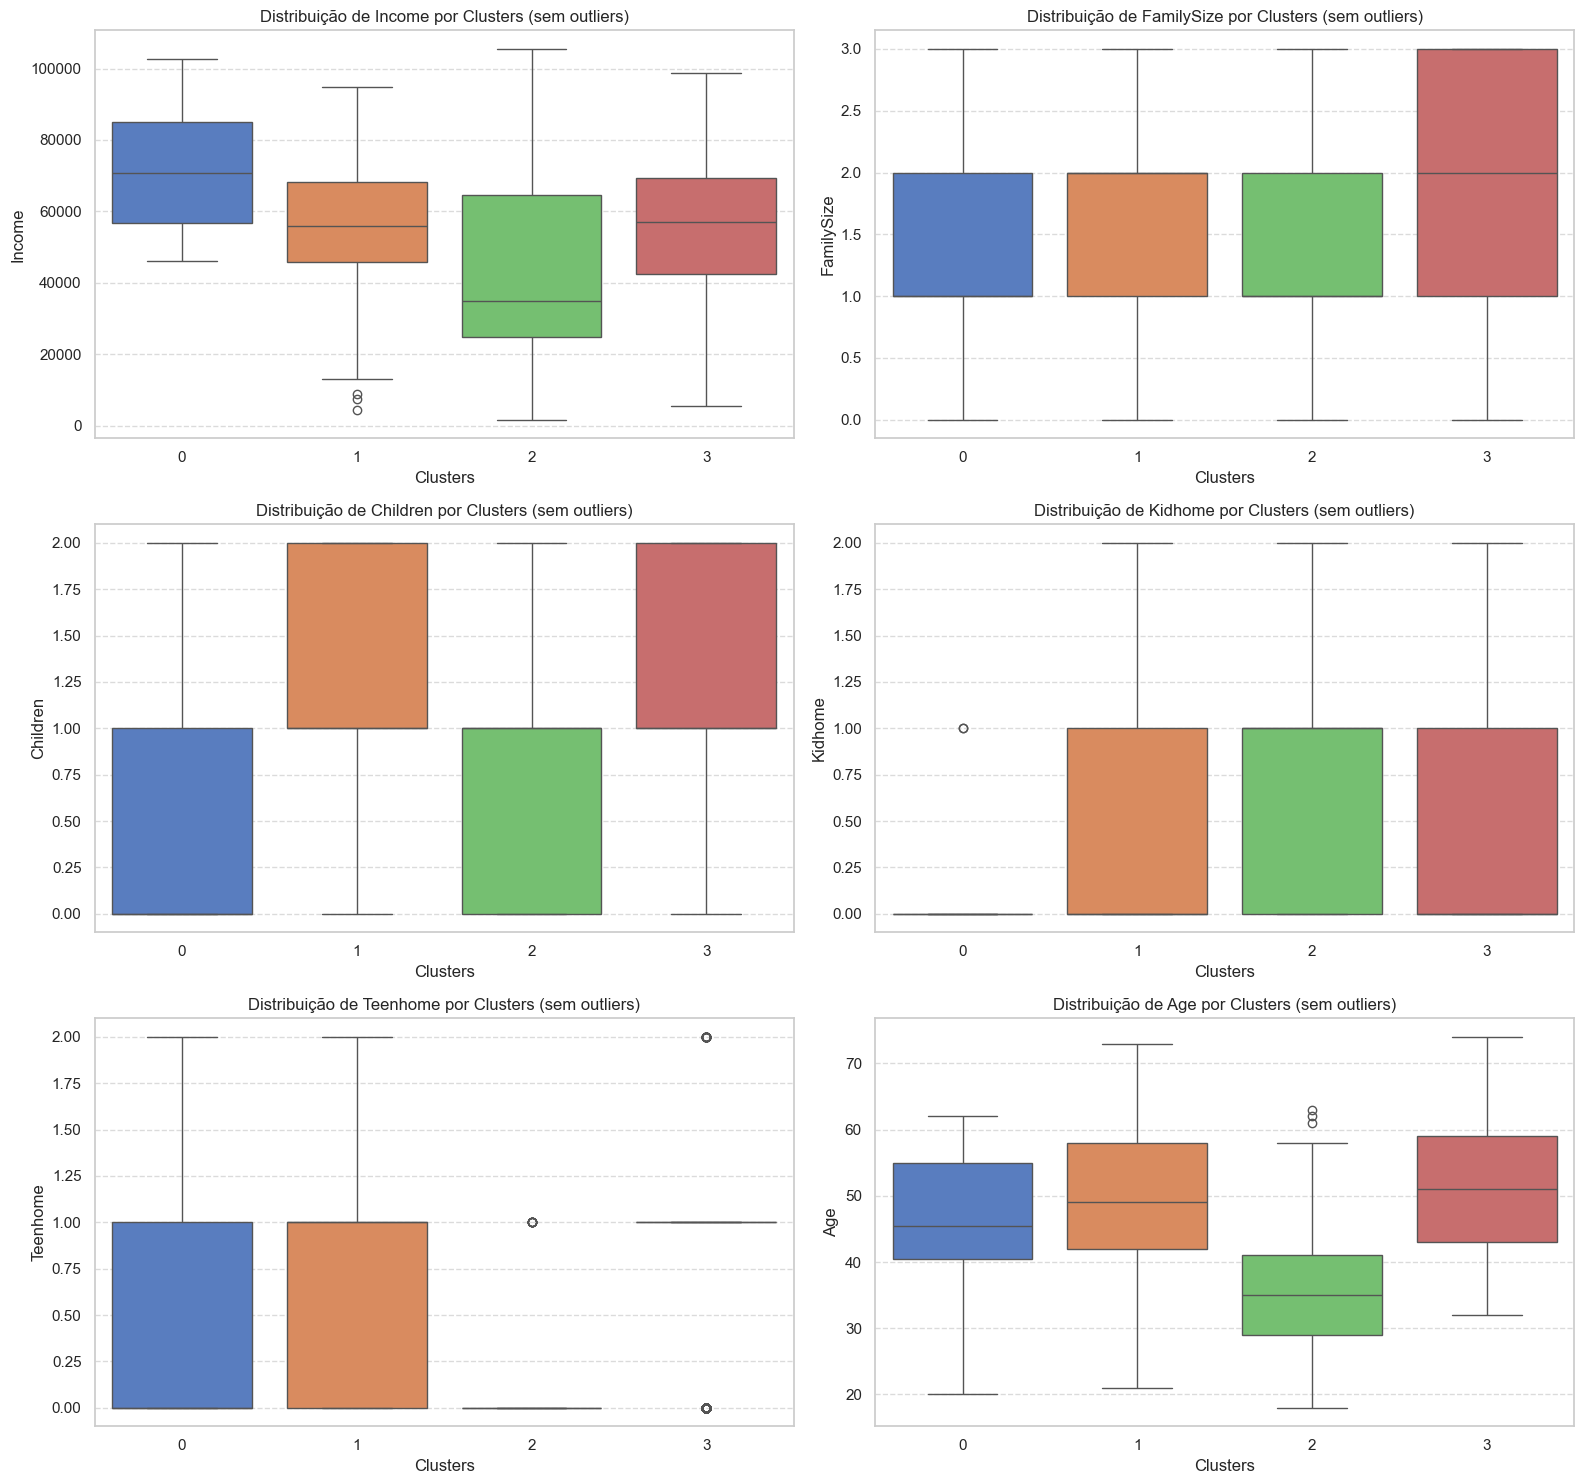

In [140]:
def clusters_compar_bloxplot_subplot(df, cols):
    # Ignora os warnings
    warnings.filterwarnings("ignore", category=FutureWarning)

    # Número de gráficos
    n_graficos = len(cols)

    # Configurando o layout com 2 colunas
    n_colunas = 2
    n_linhas = -(-n_graficos // n_colunas)  # Cálculo do número de linhas com arredondamento para cima

    # Criando a figura
    fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(16, 5 * n_linhas))
    axes = axes.flatten()  # Achatar os eixos para fácil iteração

    for i, col in enumerate(cols):
        # Cálculo do IQR (Intervalo Interquartil) para a coluna
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definição dos limites para identificar os outliers
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Remoção dos outliers
        df_sem_outliers = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]

        # Criando o boxplot no eixo correspondente
        sns.boxplot(data=df_sem_outliers, x='Clusters', y=col, palette='muted', ax=axes[i])
        axes[i].set_title(f'Distribuição de {col} por Clusters (sem outliers)', fontsize=12)
        axes[i].set_xlabel('Clusters')
        axes[i].set_ylabel(col)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Removendo eixos vazios caso o número de gráficos seja ímpar
    for i in range(n_graficos, len(axes)):
        fig.delaxes(axes[i])

    # Ajuste dos espaçamentos
    plt.tight_layout()
    plt.show()

# Chamando a função para exibir os gráficos
cols = ['Income', 'FamilySize', 'Children', 'Kidhome', 'Teenhome', 'Age']
clusters_compar_bloxplot_subplot(df, cols)

## Será que estamos investindo nos Clusters corretos?

In [141]:
def plot_multiple_barplots(df, columns_dict, clusters_column="Clusters", num_cols=2):
    """
    Gera múltiplos gráficos de barras mostrando a média por cluster para cada coluna especificada,
    com títulos personalizados.
    
    Parâmetros:
    - df: DataFrame com os dados.
    - columns_dict: Dicionário onde as chaves são os nomes das colunas e os valores são os títulos personalizados.
    - clusters_column: Nome da coluna que representa os clusters (padrão: "Clusters").
    - num_cols: Número de gráficos por linha (padrão: 2).
    """
    
    # Ignora os warnings
    warnings.filterwarnings("ignore", category=FutureWarning)
    
    num_rows = -(-len(columns_dict) // num_cols)  # Calcula o número de linhas (arredondando para cima)
    
    # Configurações gerais do gráfico
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
    
    # Transforma axes em uma lista plana (necessário se houver apenas uma linha ou uma coluna)
    if num_rows == 1 and num_cols == 1:
        axes = [axes]
    elif num_rows == 1 or num_cols == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()
    
    # Remove eixos extras caso o número de gráficos seja menor que o número total de subplots
    for ax in axes[len(columns_dict):]:
        ax.remove()
    
    # Itera pelas colunas e cria os gráficos
    for i, (col, title) in enumerate(columns_dict.items()):
        # Calcula a média por cluster e a média geral
        avg_spent_per_cluster = df.groupby(clusters_column)[col].mean().reset_index()
        avg_spent_per_cluster[clusters_column] = avg_spent_per_cluster[clusters_column].apply(lambda x: f"Cluster {x}")
        overall_avg = df[col].mean()
        
        # Paleta de cores com diferentes tons de laranja
        colors = sns.color_palette("Oranges", len(avg_spent_per_cluster))
        
        # Cria o gráfico no eixo correspondente
        ax = axes[i]
        sns.barplot(
            x=clusters_column, 
            y=col, 
            data=avg_spent_per_cluster, 
            palette=colors, 
            ax=ax
        )
        
        # Adiciona os números exatos acima de cada barra
        for j, row in avg_spent_per_cluster.iterrows():
            ax.text(j, row[col] + 0.02 * overall_avg, f'{row[col]:.2f}', ha='center', fontsize=10, color="black")
        
        # Adiciona a linha média geral4
        ax.axhline(overall_avg, color="red", linestyle="--", label=f"Média Total ({overall_avg:.2f})")
        
        # Personalizações
        ax.set_title(title, fontsize=14)
        ax.set_xlabel("Clusters", fontsize=12)
        ax.set_ylabel(f"Média ({col})", fontsize=12)
        ax.legend()

    plt.tight_layout()
    plt.show()


## Quais Clusters trazem mais retornos? E quais trazem menos retorno?

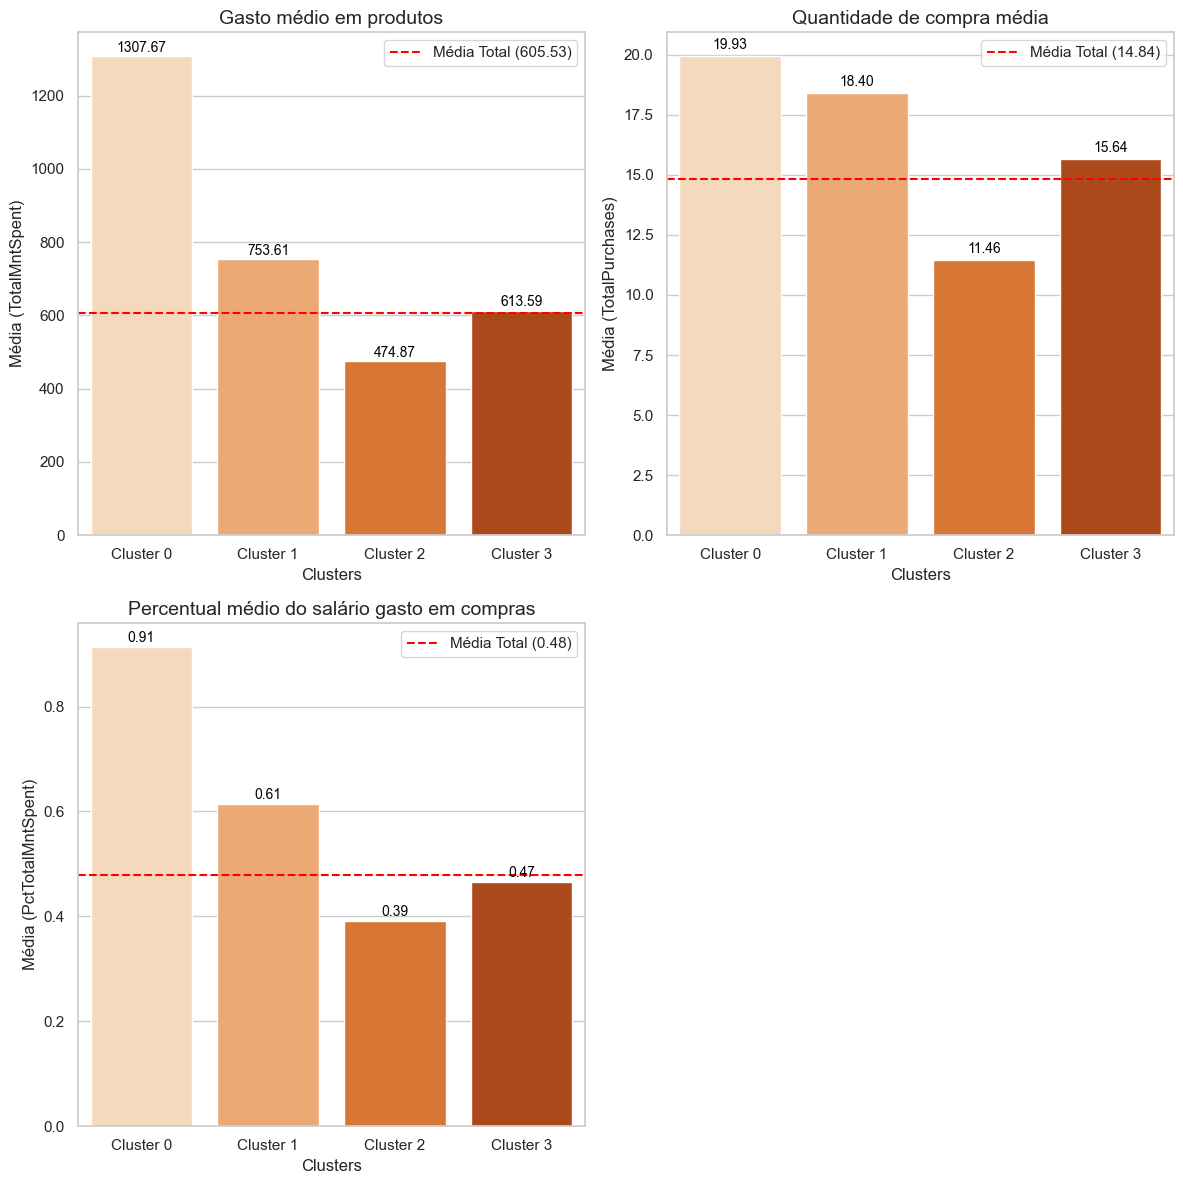

In [142]:
columns_to_analyze = {
    "TotalMntSpent": "Gasto médio em produtos",
    "TotalPurchases": "Quantidade de compra média",
    "PctTotalMntSpent": "Percentual médio do salário gasto em compras"
}

# Calcular a porcentagem de "TotalMntSpent" em relação a "Income"
df['Month_Income'] = df['Income'] / 12
df['Month_TotalMntSpent'] = df['TotalMntSpent'] / 2
df['Month_TotalMntSpent'] = df['Month_TotalMntSpent'] / 12

df['PctTotalMntSpent'] = (df['Month_TotalMntSpent'] / df['Month_Income']) * 100

plot_multiple_barplots(df, columns_to_analyze)


df.drop(columns=['Month_Income', 'Month_TotalMntSpent', 'PctTotalMntSpent'], inplace=True)

## Onde mais compra cada Cluster?

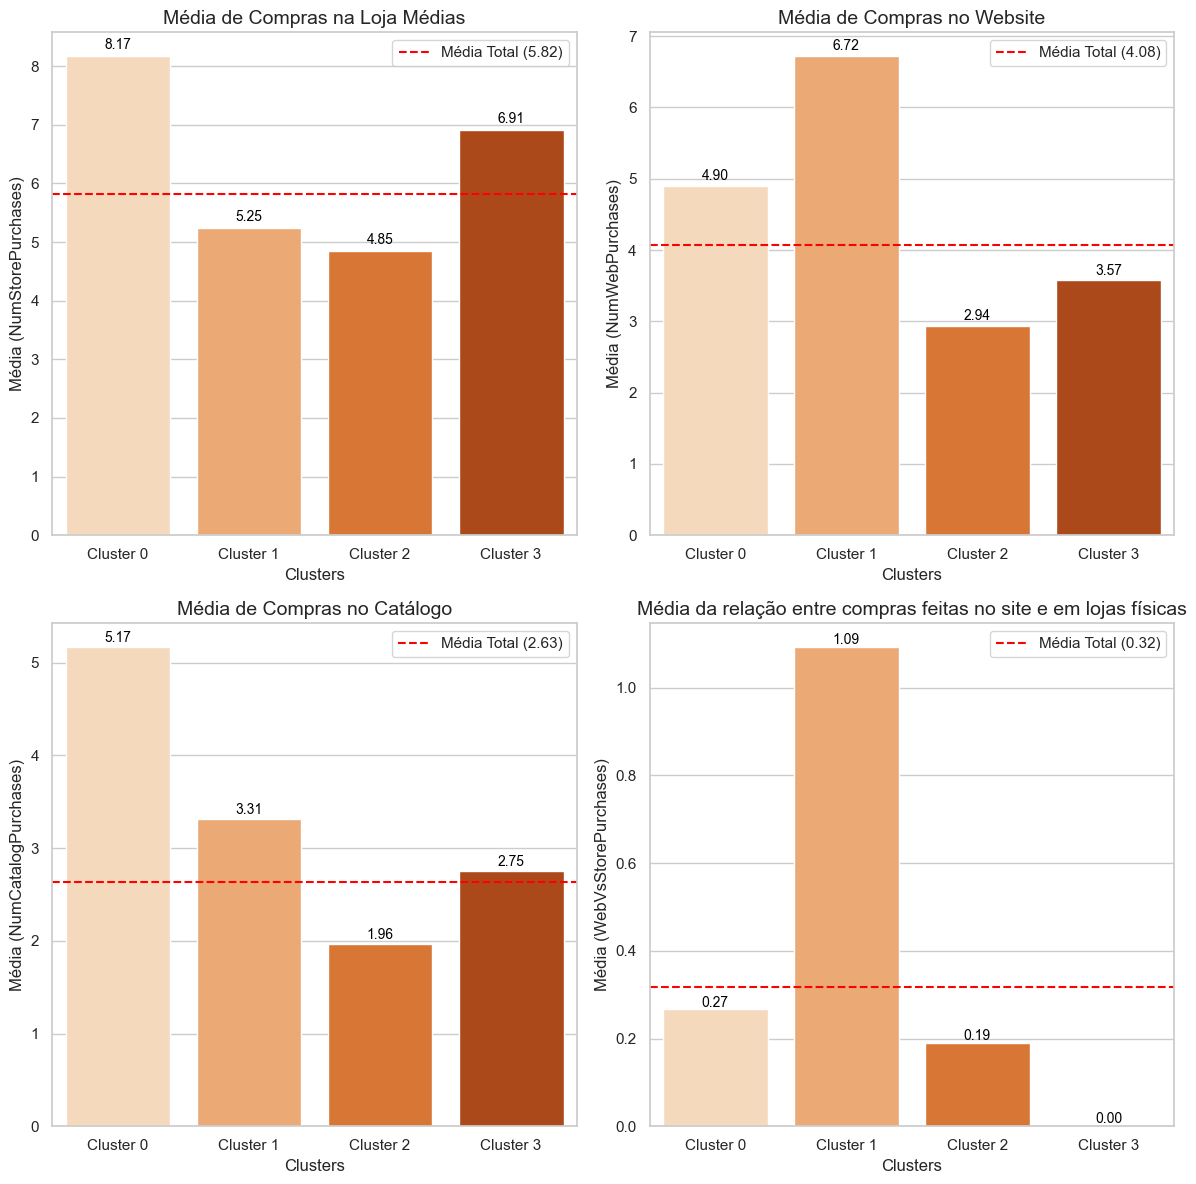

In [143]:
columns_to_analyze = {
    "NumStorePurchases": "Média de Compras na Loja Médias",
    "NumWebPurchases": "Média de Compras no Website",
    "NumCatalogPurchases": "Média de Compras no Catálogo",
    "WebVsStorePurchases": "Média da relação entre compras feitas no site e em lojas físicas"
}

plot_multiple_barplots(df, columns_to_analyze)

## Comparação demográfica entre os Clusters

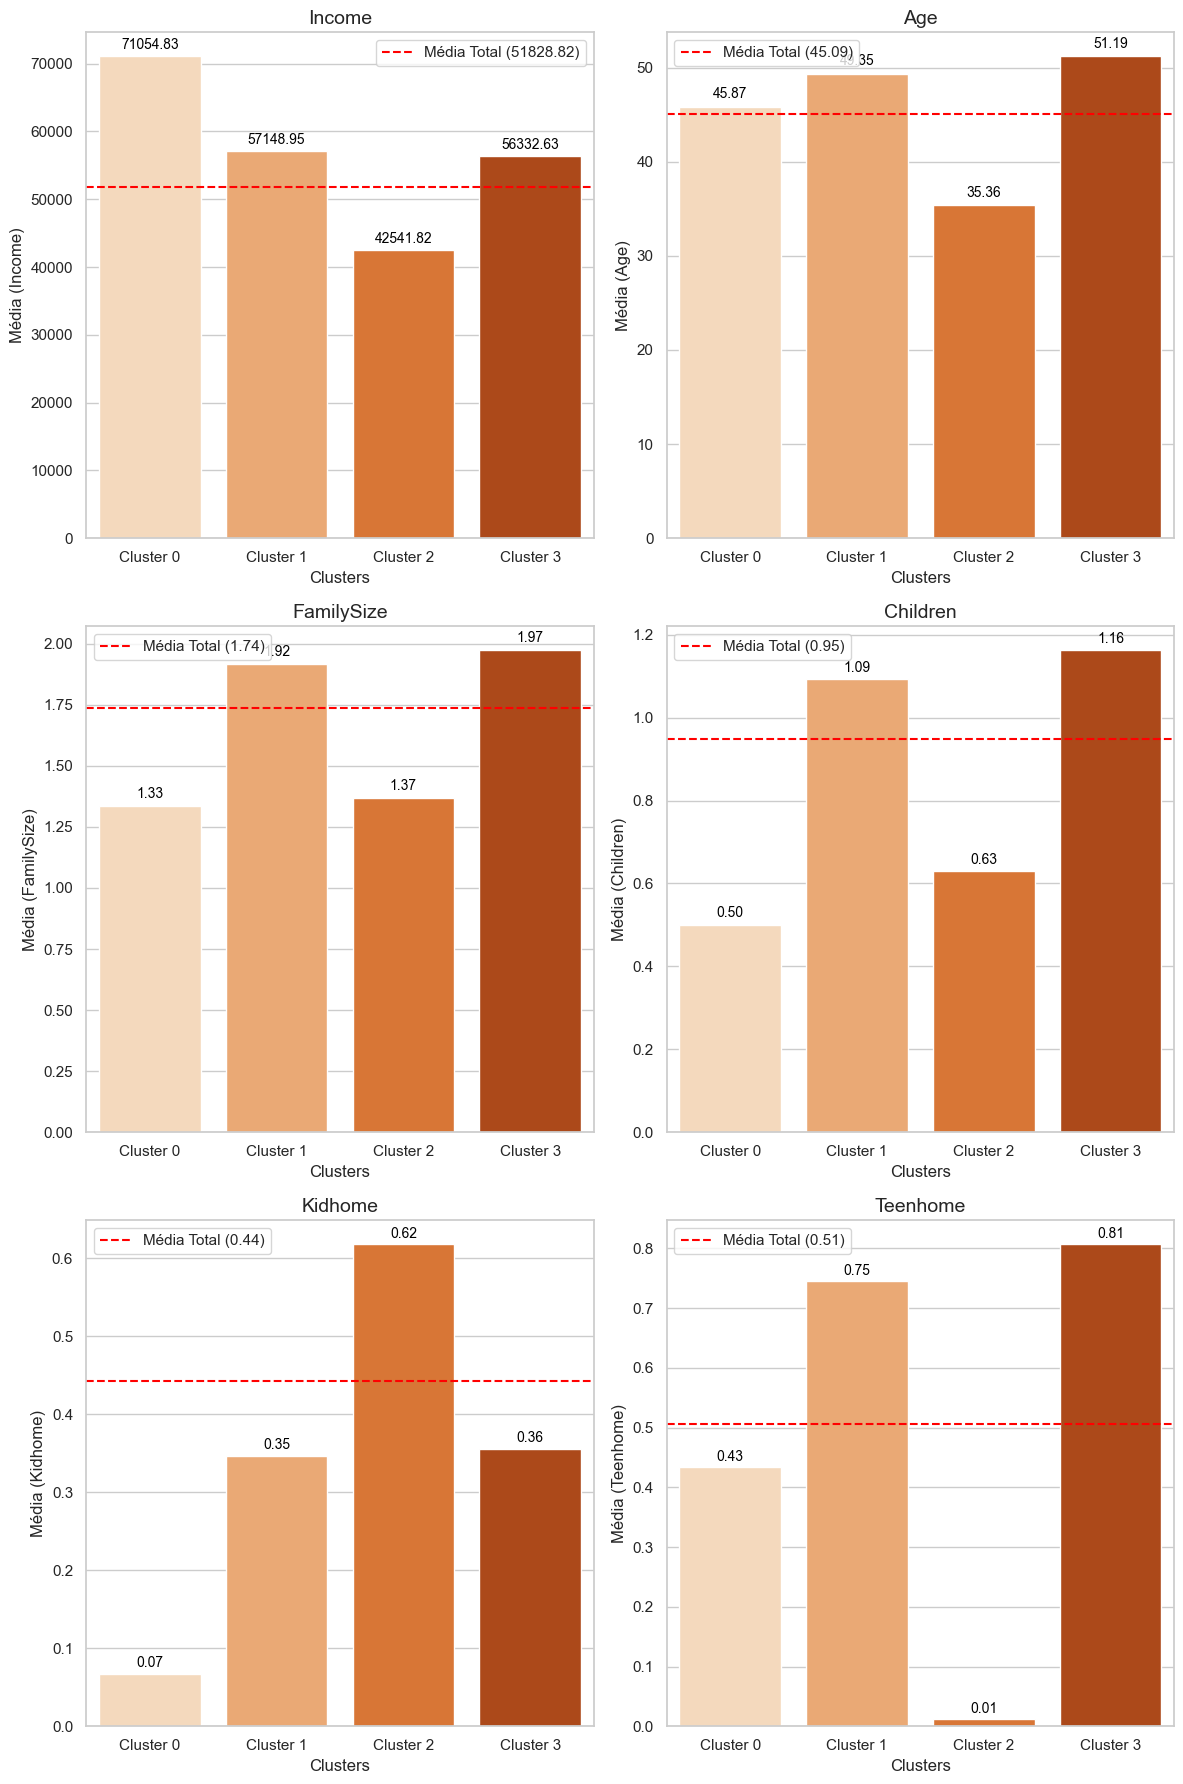

In [144]:
columns_to_analyze = {
    "Income": "Income",
    "Age": "Age",
    "FamilySize": "FamilySize",
    "Children": "Children",
    "Kidhome": "Kidhome",
    "Teenhome": "Teenhome"
}

plot_multiple_barplots(df, columns_to_analyze)

# Perfil dos Clusters

### **Cluster 0**
Este grupo consiste em consumidores com renda média alta, geralmente acima dos 45 anos, que investem significativamente em produtos de luxo e bebidas alcoólicas. São casados ou em relacionamentos, com famílias pequenas ou sem filhos. O comportamento de compra reflete um estilo de vida sofisticado, com alta aceitação em campanhas de marketing.

- **Idade média**: 45,9 anos (máximo: 62 anos).  
- **Renda média**: R$71.054 (variação: R$46.015 - R$102.692).  
- **Gastos principais**: Vinhos (R$898), carnes (R$250), produtos de luxo (R$66).  
- **Gasto total médio**: R$1.307 por ano.  
- **Participação em campanhas**: Alta, com grande aceitação em todas as campanhas.  
- **Tamanho familiar**: Pequeno (média de 1,3 pessoas).
- **Estado civil**:  
   - Tem forte presença na categoria **Junto(a)**, indicando que muitos clientes desse cluster estão em relacionamentos (uniões estáveis, mas não formalmente casados).  
   - Também apresenta uma participação notável em **Casado(a)** e **Solteiro(a)**, mas menor em outras categorias como **Divorciado(a)** e **Viúvo(a)**.  
   - Pode representar pessoas em relacionamentos, mas não exclusivamente casadas, talvez em uma fase de vida de estabilidade conjugal.
---

### **Cluster 1**
Este cluster é composto por consumidores de meia idade com renda média moderada. São levemente propensos a gastar em vinhos e carnes, mas seus gastos gerais são mais conservadores. Embora geralmente casados, suas famílias são pequenas ou inexistentes.

- **Idade média**: 49,3 anos (máximo: 73 anos).  
- **Renda média**: R$57.148 (variação: R$4.428 - R$157.733).  
- **Gastos principais**: Vinhos (R$422), carnes (R$175), frutas (R$28).  
- **Gasto total médio**: R$753 por ano.  
- **Participação em campanhas**: Moderada, com taxas de resposta em torno de 22%.  
- **Tamanho familiar**: Pequeno (média de 1,9 pessoas).
- **Estado civil**:  
   - Este cluster parece mais equilibrado, com proporções relativamente distribuídas entre **Casado(a)**, **Junto(a)** e **Solteiro(a)**, mas sem grandes picos em nenhuma categoria específica.  
   - Mostra proporções baixas nas categorias como **Viúvo(a)**, o que pode indicar que o cluster inclui pessoas com status civil mais convencionais.  
   - Pode representar um perfil mais diversificado em termos de estado civil.

---

### **Cluster 2**
Predominantemente jovens adultos, este cluster tem a menor renda média e um perfil de consumo básico. A maioria dos gastos é concentrada em carne, vinhos e itens essenciais. Eles tendem a responder menos às campanhas, provavelmente devido às restrições financeiras.

- **Idade média**: 35,4 anos (máximo: 63 anos).  
- **Renda média**: R$42.541 (variação: R$1.730 - R$105.471).  
- **Gastos principais**: Carne (R$155), vinhos (R$205), peixe (R$32).  
- **Gasto total médio**: R$474 por ano.  
- **Participação em campanhas**: Moderada, com resposta de 18%.  
- **Tamanho familiar**: Pequeno (média de 1,3 pessoas).
- **Estado civil**:  
   - Este cluster se destaca fortemente na categoria **Casado(a)**, mostrando que a maioria das pessoas nele está formalmente casada.  
   - Possui proporções significativamente menores nas categorias **Solteiro(a)**, **Junto(a)** e quase inexistentes nas categorias **Viúvo(a)**.
   - Pode ser caracterizado como um cluster de pessoas em relacionamentos formais e estáveis.

---

### **Cluster 3**
Um grupo diversificado em termos de idade e renda, com comportamento de compra balanceado. Seus gastos incluem itens de maior valor como vinhos e carnes, mas também compras de itens diversificados. Eles têm uma resposta média às campanhas.

- **Idade média**: 51,2 anos (máximo: 74 anos).  
- **Renda média**: R$56.332 (variação: R$5.648 - R$162.397).  
- **Gastos principais**: Vinhos (R$309), carnes (R$163), frutas (R$28).  
- **Gasto total médio**: R$613 por ano.  
- **Participação em campanhas**: Moderada, com resposta de 6%.  
- **Tamanho familiar**: Pequeno (média de 1,9 pessoas).
- **Estado civil**:  
   - Apresenta maior proporção em **Solteiro(a)**, indicando que muitos clientes neste cluster estão solteiros.  
   - Tem menor presença em categorias como **Casado(a)** e **Junto(a)** e proporções muito pequenas em **Viúvo(a)**.  
   - Representa um perfil de pessoas solteiras, possivelmente em uma fase de vida mais independente.

---

## Preferencia de Produtos na Compra por Cluster

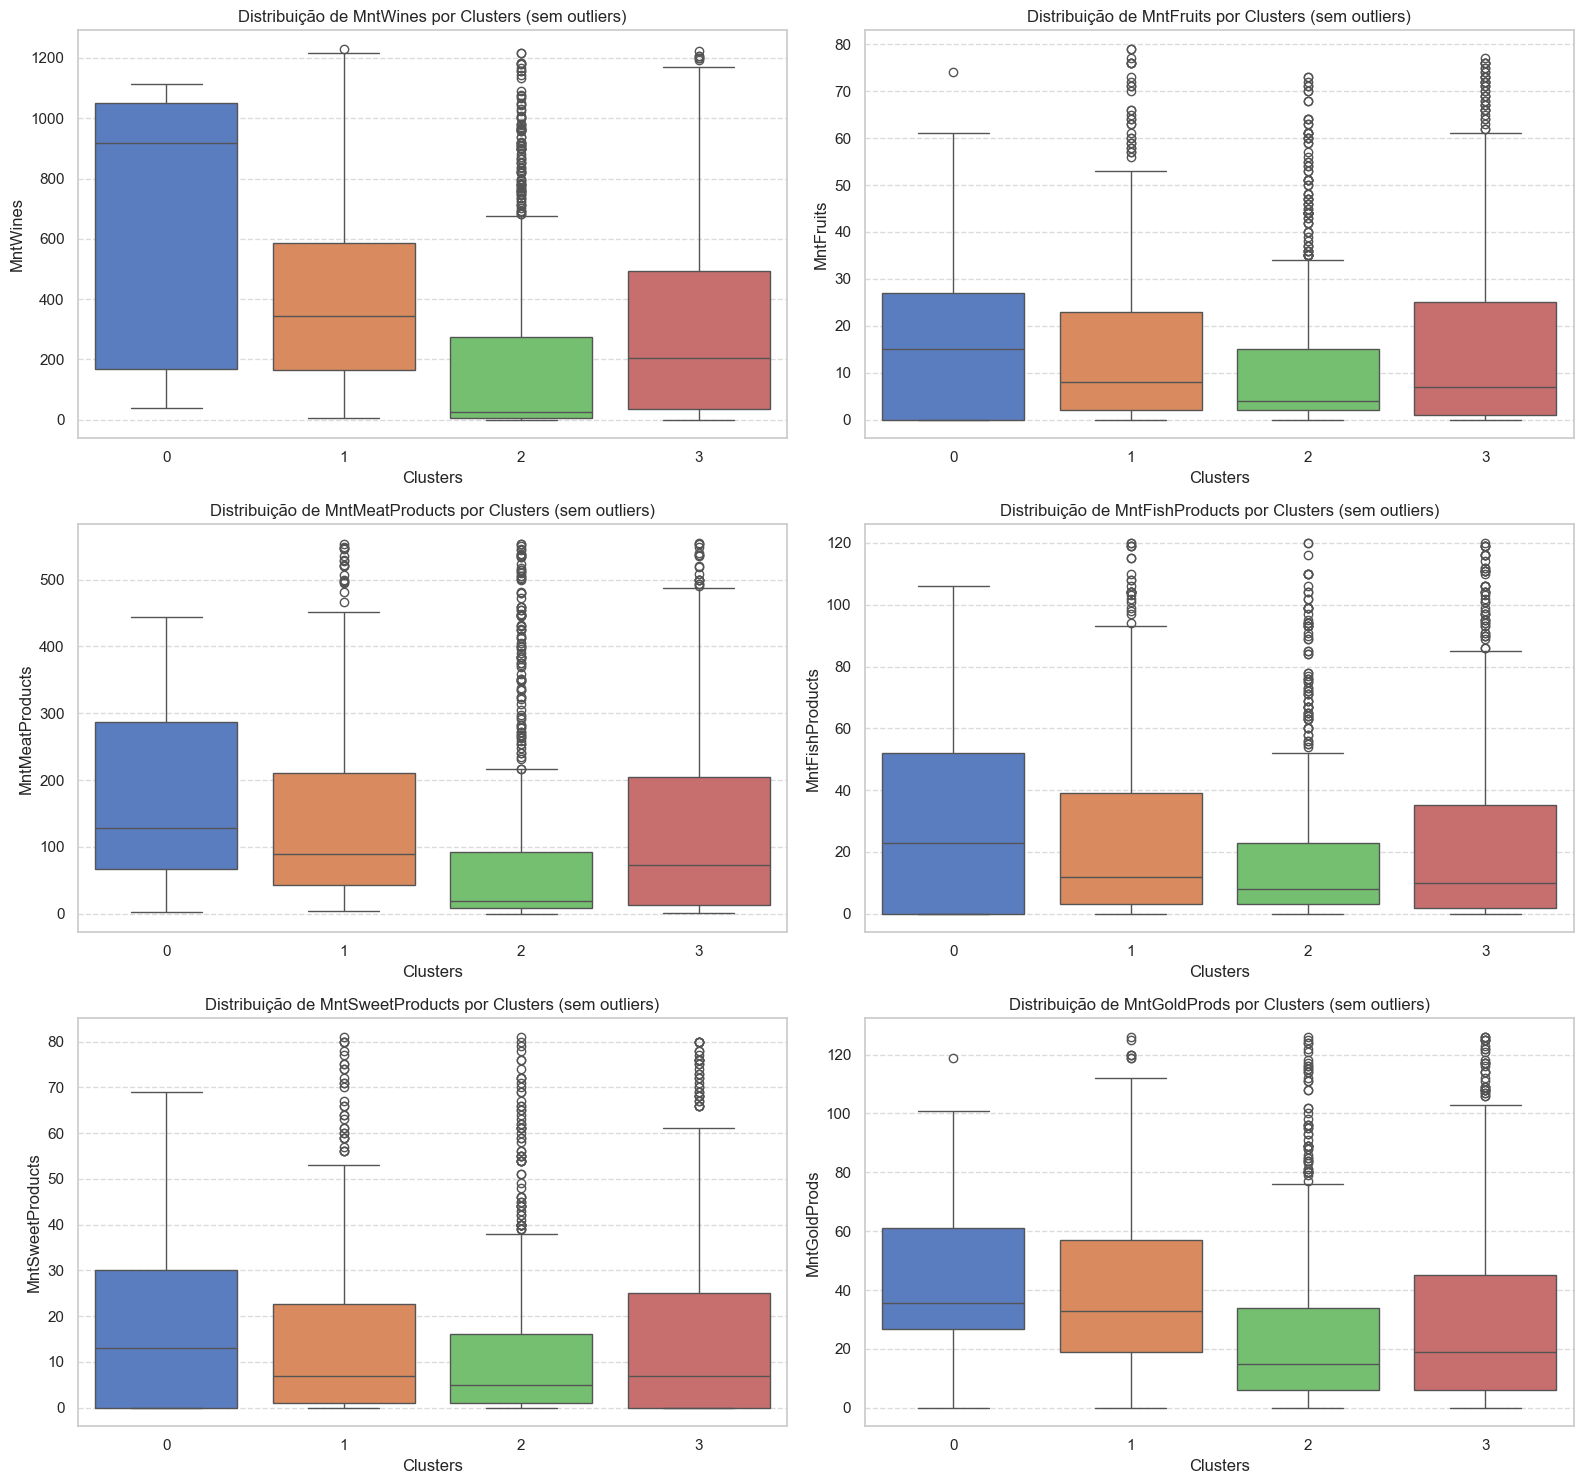

In [145]:
# Chamando a função para exibir os gráficos
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
clusters_compar_bloxplot_subplot(df, cols)

### Seguimentos:

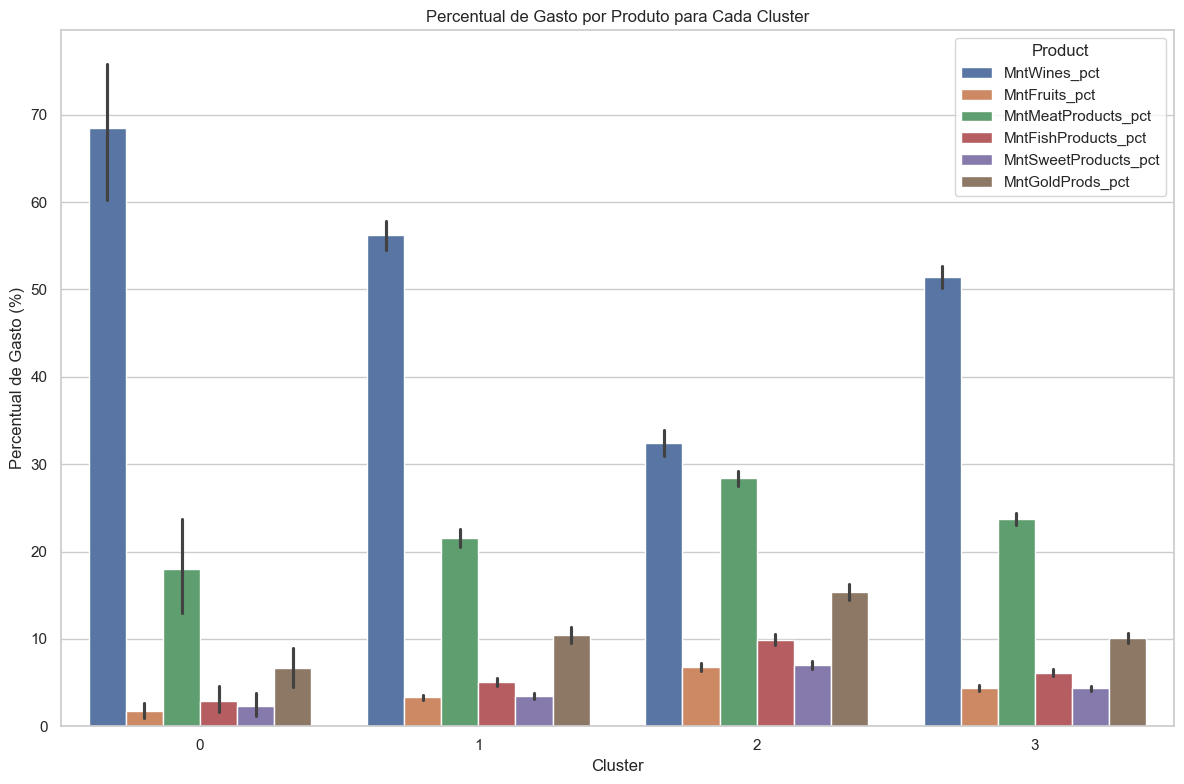

In [146]:
def seguimentos():
    # Supondo que seu dataframe seja 'df'
    # Calculando o gasto total por cluster
    df['TotalMntSpent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

    # Calculando o percentual de gasto de cada produto em relação ao gasto total
    products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
    for product in products:
        df[f'{product}_pct'] = df[product] / df['TotalMntSpent'] * 100

    # Reshaping para plotar os dados de forma adequada
    df_melted = df[['Clusters'] + [f'{product}_pct' for product in products]].melt(id_vars='Clusters', var_name='Product', value_name='Percentage')

    # Plotando o gráfico com clusters no eixo X
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Clusters', y='Percentage', hue='Product', data=df_melted)

    # Ajustando o título e rótulos
    plt.title('Percentual de Gasto por Produto para Cada Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Percentual de Gasto (%)')

    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()

seguimentos()

## Onde Compra cada Cluster

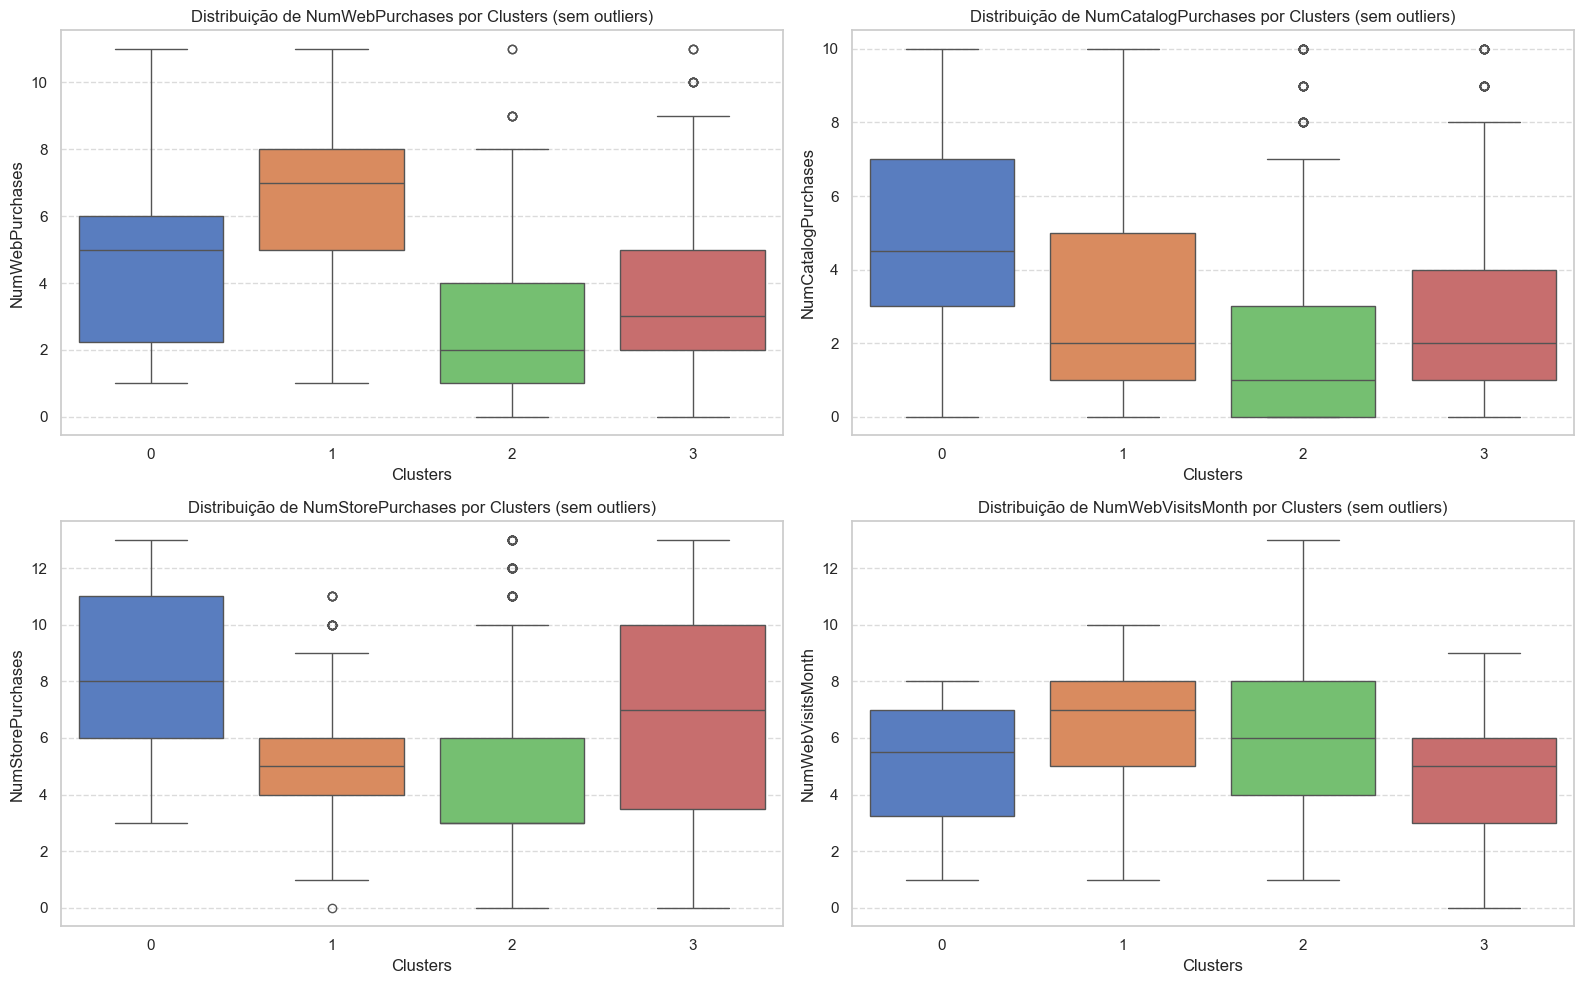

In [147]:
# Chamando a função para exibir os gráficos
cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
clusters_compar_bloxplot_subplot(df, cols)

<img src="https://media.licdn.com/dms/image/v2/D4D03AQGKyH2VYxJFNw/profile-displayphoto-shrink_200_200/B4DZR3AMiKHkAc-/0/1737163329100?e=1742428800&v=beta&t=g3jnt105dxEQvOyv2XAy6EJjviKfFrw1yH61s28JqYk" alt="capa" width="100">

#### [Enzo Schitini](www.linkedin.com/in/enzoschitini)
#### Data Scientist & Data Analyst • Senior Bubble Developer • SQL • Ux/Ui Design 
[*@ Scituffy Founder*](https://scituffy.bubbleapps.io/version-test/index/home)